In [ ]:
import pandas as pd
import missingno as msno
import seaborn as sns
import matplotlib.pyplot as plt 
import numpy as np

In [ ]:
data=pd.read_csv("DS_Proyecto_01_Datos_Properati.csv")
data.head(1)

,start_date,end_date,created_on,lat,lon,l1,l2,l3,rooms,bedrooms,bathrooms,surface_total,surface_covered,price,currency,title,description,property_type,operation_type
0,2019-10-17,2019-12-23,2019-10-17,-34.60588,-58.384949,Argentina,Capital Federal,San Cristobal,7.0,7.0,2.0,140.0,140.0,153000.0,USD,"***Venta semipiso centro, ideal hostel*****",DESCRIPCION DE LA PROPIEDAD: Departamento de 1...,Departamento,Venta


In [ ]:
data.shape

(146660, 19)

### Traemos las mismas condiciones que las que nos pidieron en el TP1 para tener un parámetro de comparación.

In [ ]:
dataproperati= ((data.l2 == 'Capital Federal')&(data.property_type =='Casa')|(data.l2 == 'Capital Federal')&(data.property_type =='Departamento')| (data.l2 == 'Capital Federal')&(data.property_type =='PH')).copy()           

dataproperati=data[dataproperati].copy()
dataproperati.shape

(91485, 19)

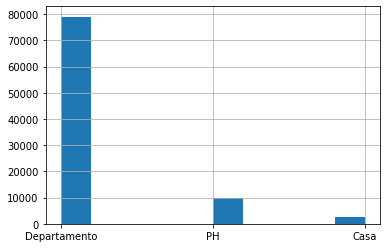

In [ ]:
dataproperati.head(2)
#data.info()
hist=dataproperati["property_type"].hist(bins=10)

#### Cuántos valores faltantes hay por columna?

In [ ]:
print("¿Cuántos valores faltantes hay en cada columna?")
dataproperati.isna().sum()

¿Cuántos valores faltantes hay en cada columna?


start_date            0
end_date              0
created_on            0
lat                4534
lon                4548
l1                    0
l2                    0
l3                    0
rooms                 0
bedrooms              0
bathrooms          2171
surface_total      8917
surface_covered    9235
price                 0
currency              0
title                 0
description           0
property_type         0
operation_type        0
dtype: int64

#### En base a los valores faltantes que vemos que hay presentes, podemos proceder a ver la distribución de los datos.

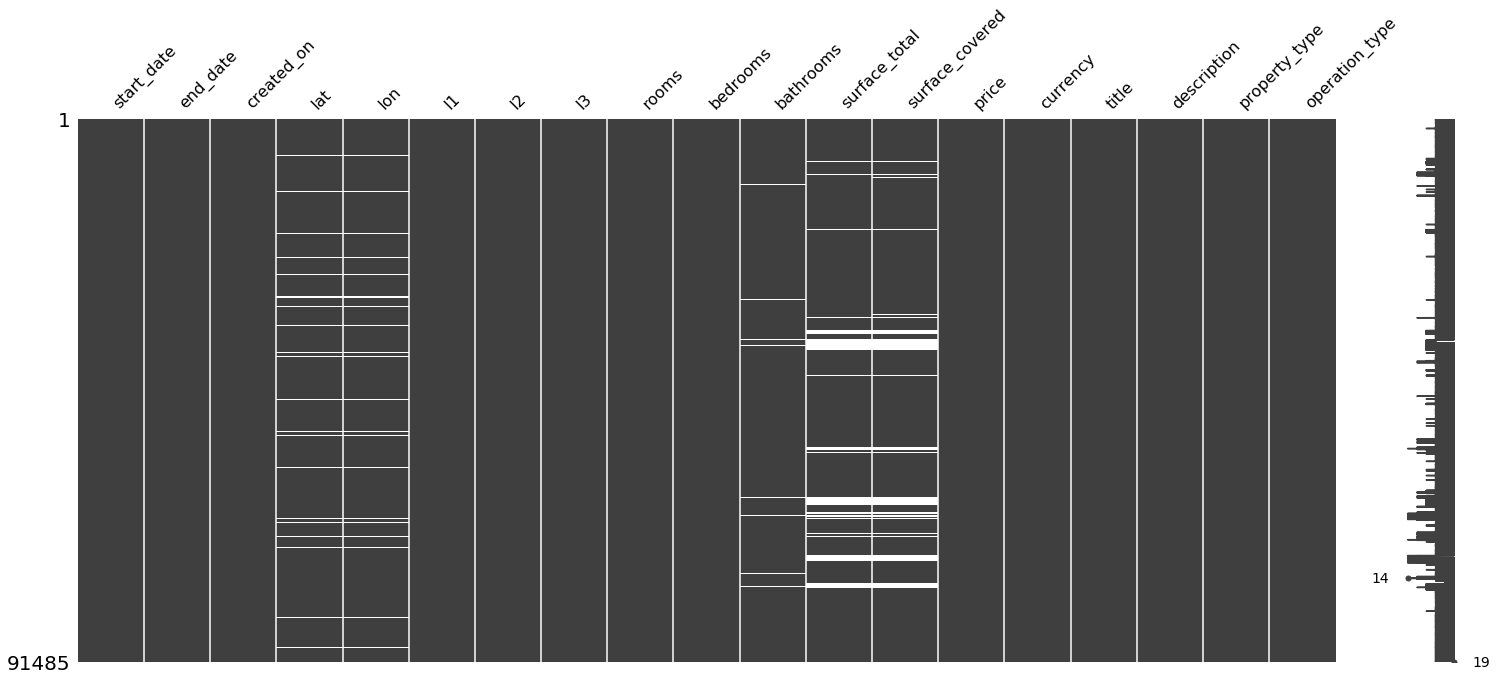

In [ ]:
msno.matrix(dataproperati)

#### En base a la matriz de Missingno podemos ver que los valores faltantes de "lat" y "lon" se correlacionan al 100%, es decir que cuando falta un "lat", falta un "lon".
#### Pasa algo similar con los valores de las superficies, asíque vamos a investigarlo...

### Detectando valores perdidos
#### Detecting missing values numerically
>El primer paso es detectar el recuento / porcentaje de valores perdidos en cada columna del conjunto de datos. Esto dará una idea de la distribución de los valores perdidos.

In [ ]:
def missing_values_table(df):
        # Total missing values
        mis_val = df.isnull().sum()
        
        # Percentage of missing values
        mis_val_percent = 100 * df.isnull().sum() / len(df)
        
        # Make a table with the results
        mis_val_table = pd.concat([mis_val, mis_val_percent], axis=1)
        
        # Rename the columns
        mis_val_table_ren_columns = mis_val_table.rename(
        columns = {0 : 'Valores faltantes', 1 : '% de Valores Totales'})
        
        # Sort the table by percentage of missing descending
        mis_val_table_ren_columns = mis_val_table_ren_columns[
            mis_val_table_ren_columns.iloc[:,1] != 0].sort_values(
        '% de Valores Totales', ascending=False).round(1)
        
        # Print some summary information
        print ("Your selected dataframe has " + str(df.shape[1]) + " columns.\n"      
            "There are " + str(mis_val_table_ren_columns.shape[0]) +
              " columns that have missing values.")
        
        # Return the dataframe with missing information
        return mis_val_table_ren_columns


In [ ]:
train_missing= missing_values_table(dataproperati)
train_missing

Your selected dataframe has 19 columns.
There are 5 columns that have missing values.


,Valores faltantes,% de Valores Totales
surface_covered,9235,10.1
surface_total,8917,9.7
lon,4548,5.0
lat,4534,5.0
bathrooms,2171,2.4


#### Buscamos algun tipo de correlacion con los datos faltantes

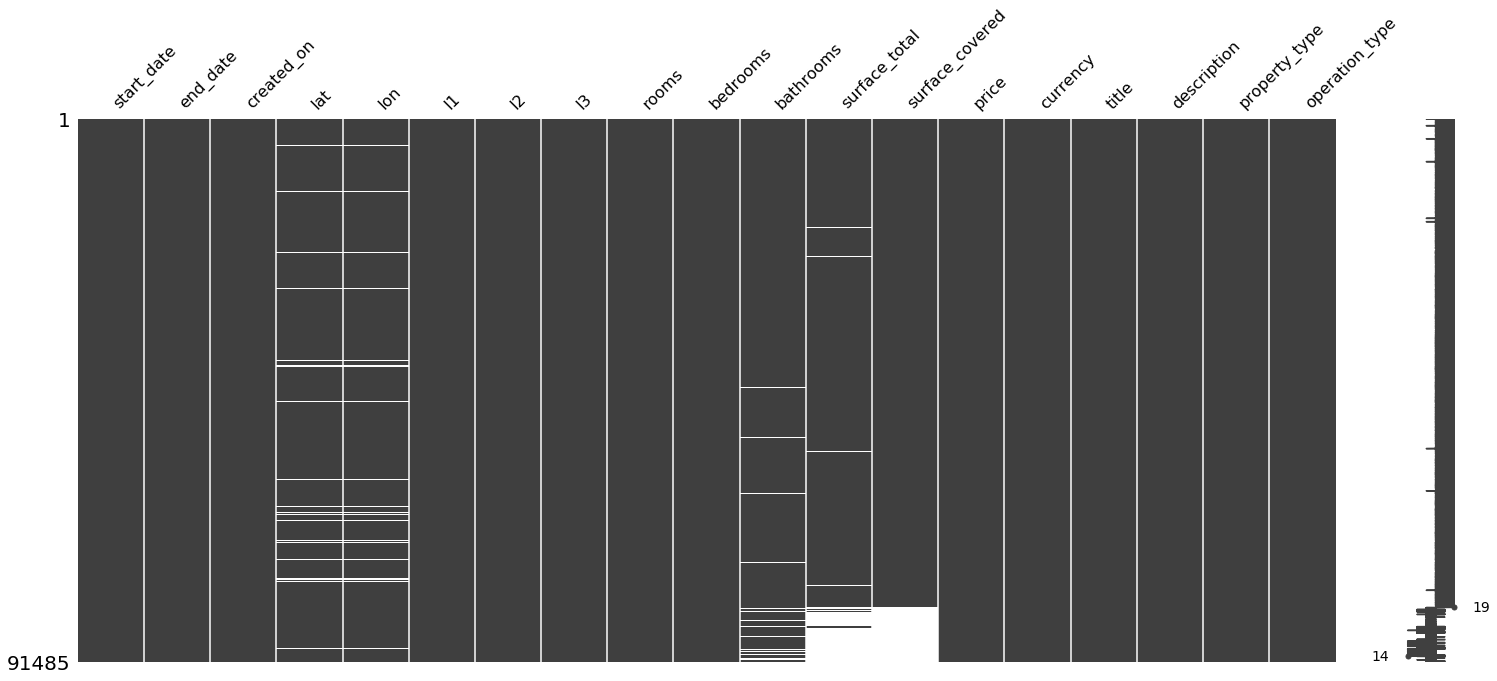

In [ ]:
#sorted by surface_covered
sorted = dataproperati.sort_values('surface_covered')
msno.matrix(sorted)

#### A partir del filtro ordenado por el la columna con mas valores faltantes (surface_covered), se puede ver que tiene una gran correlacion con (surface_total).
#### Queda en evidencia lo que dice previamente el cuadro de % de Valores Faltantes

#### Ahora ordenando por latitud, vemos que obtenemos:

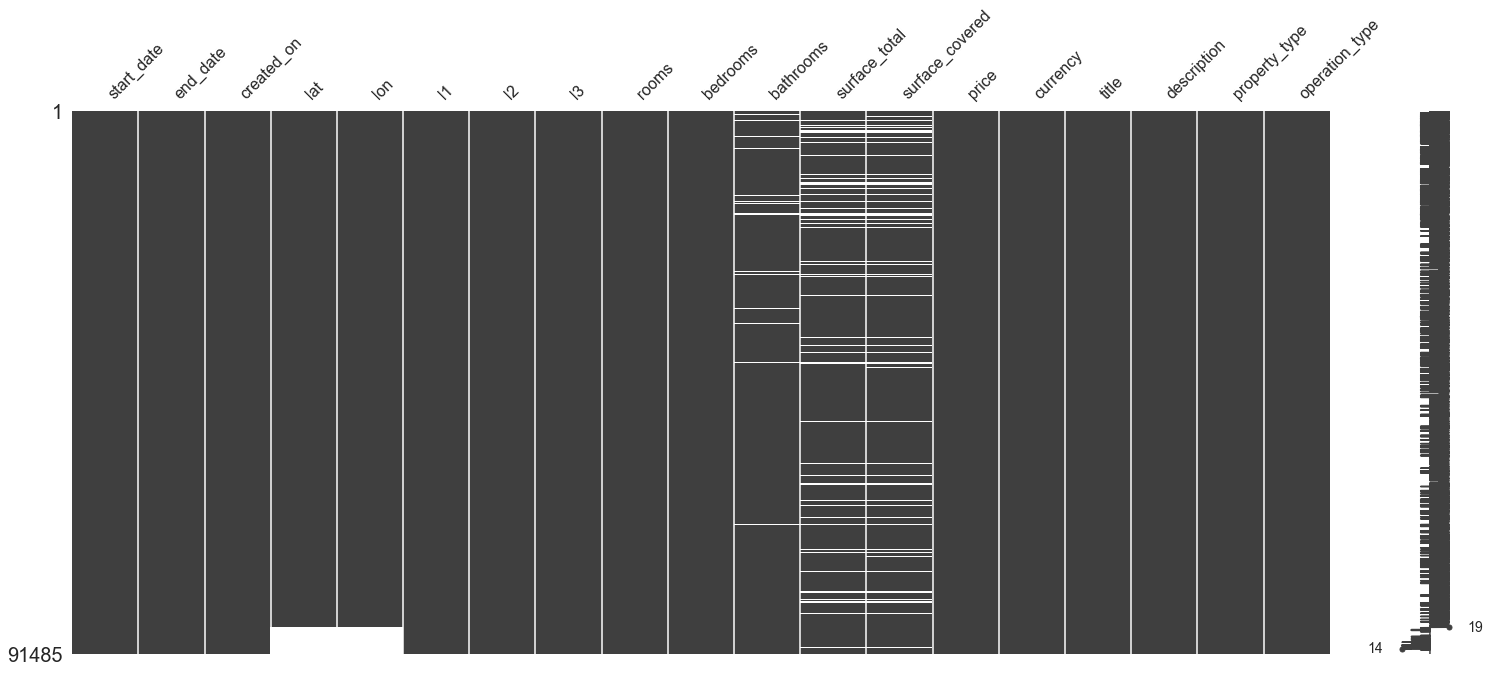

In [ ]:
#sorted by Latitud
sorted = dataproperati.sort_values('lat')
msno.matrix(sorted)

#### Vemos claramente que los valores faltantes de latitud y longitud estan %100 correlacionados.

#### Ahora vamos a ver si la fecha en la que los datos fueron cargados tiene algo que ver.
> Pero, para que queremos ver la fecha?. Lo que queremos ver es si a partir de cierta fecha, se dejaron de cargar ciertos datos. En base a eso, podremos "achicar" en cierta forma nuestro dataset para quitar esos valores faltantes.

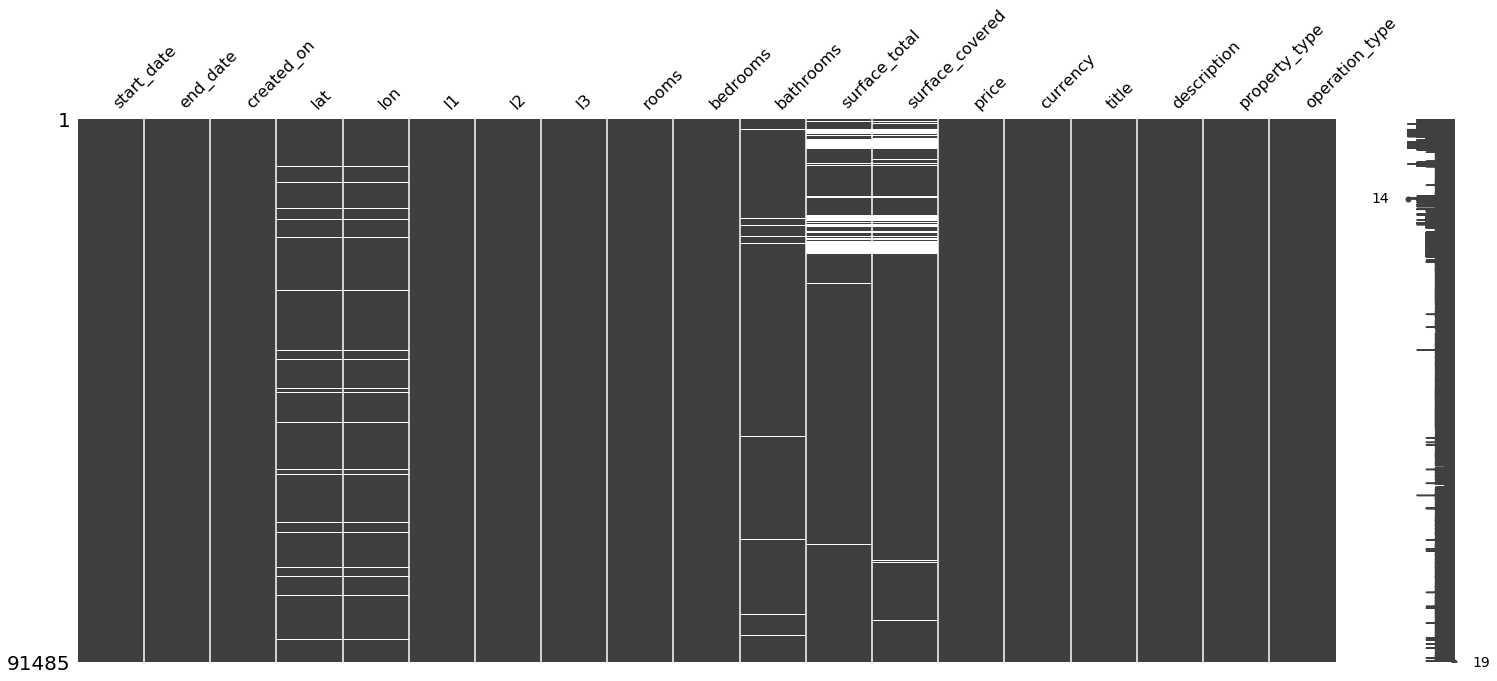

In [ ]:
#sorted by start_date
sorted = dataproperati.sort_values('start_date',  ascending= False)
msno.matrix(sorted)

### Detectando datos faltantes visualmente usando la biblioteca Missingno
>Para analizar gráficamente la falta de datos, usemos una biblioteca llamada [Missingno](https://github.com/ResidentMario/missingno) Es un paquete para el análisis gráfico de valores perdidos. Para usar esta biblioteca, necesitamos importarla de la siguiente manera: `import missingno as msno`

C:\Users\Alfredo\anaconda3\lib\site-packages\pandas\plotting\_matplotlib\core.py:1330: MatplotlibDeprecationWarning: Support for uppercase single-letter colors is deprecated since Matplotlib 3.1 and will be removed in 3.3; please use lowercase instead.
  return ax.bar(x, y, w, bottom=start, log=log, **kwds)


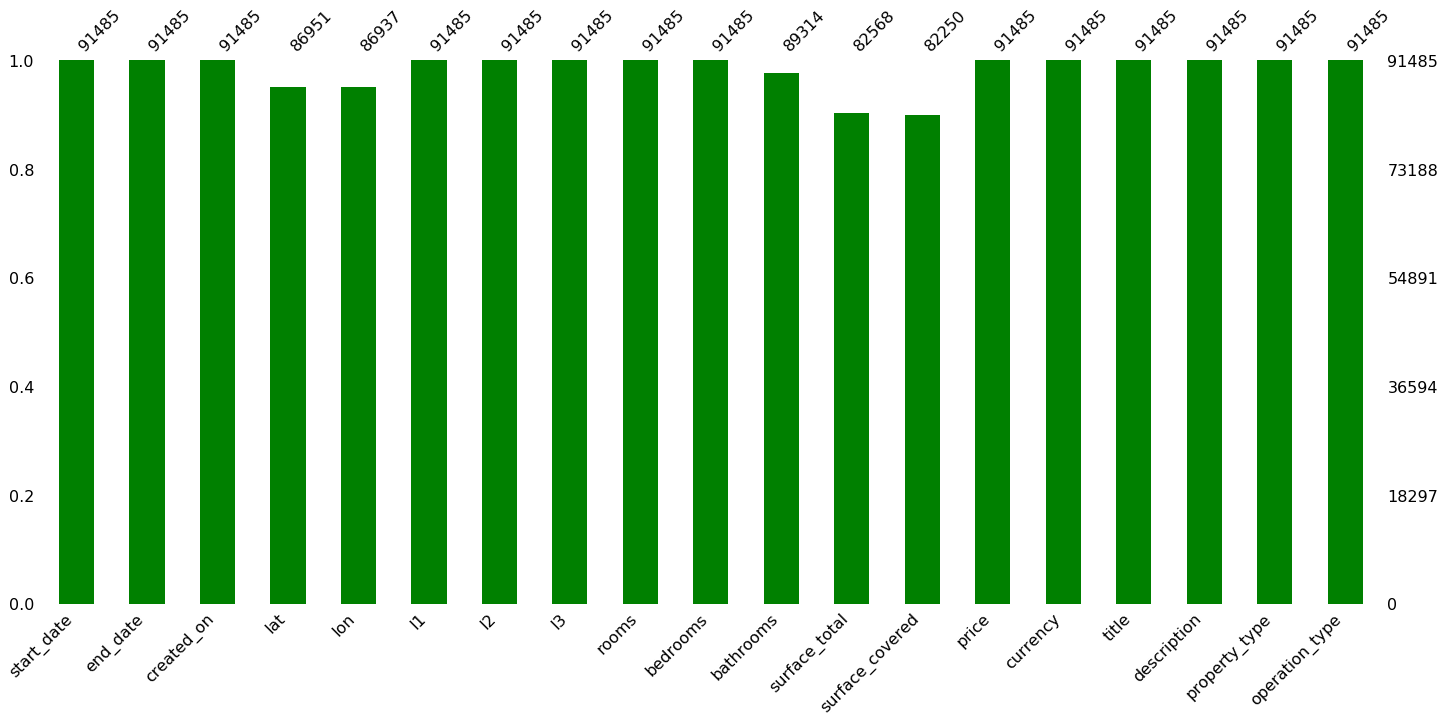

In [ ]:
msno.bar(dataproperati, color="G")

### Encontrar la razón por la que faltan datos usando un mapa de calor

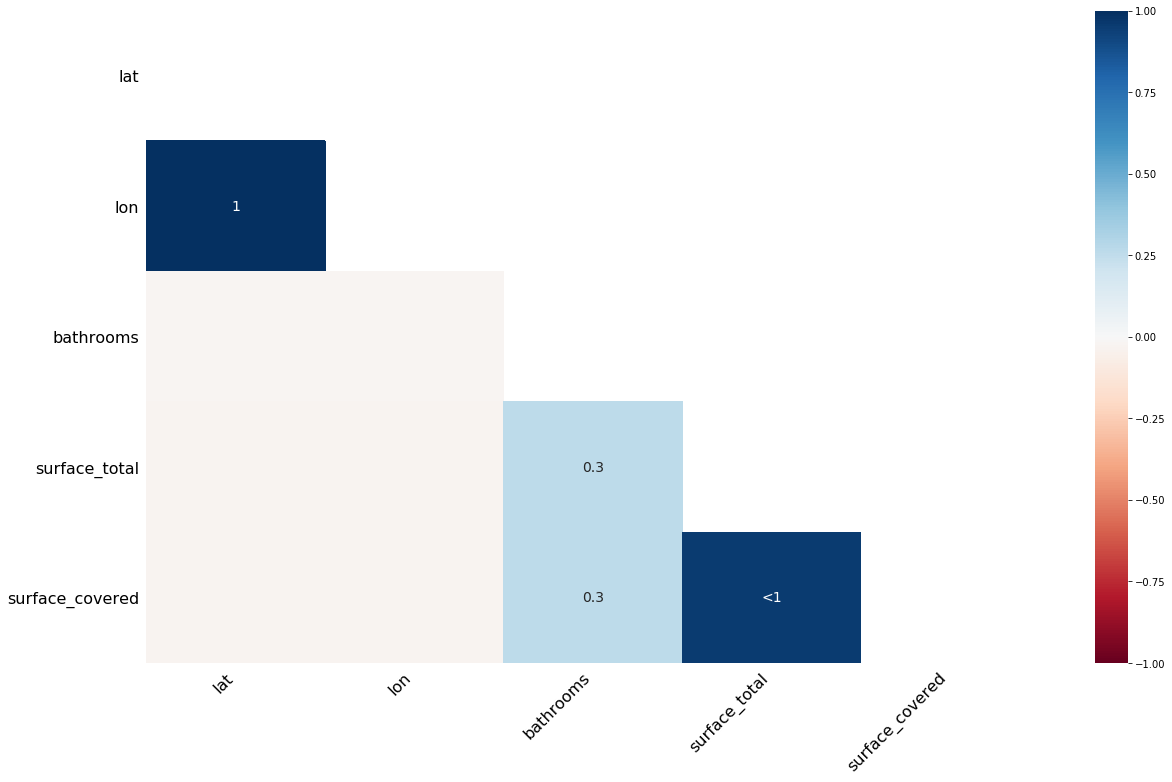

In [ ]:
msno.heatmap(dataproperati)

### MNAR y MAR
> Visto el gráfico de correlaciones, podemos ver que la variable "Surface_covered" y "Surface_total", tienen una correlacion muy significativa. Es decir sus valores faltantes no son al azar (MNAR). 
> Lo mismo pasa con los datos de latitud y longitud, su correlacion de valores faltantes es del % 100.
> Mientras que la variable "Bathrooms", no esta muy correlacionada con el resto de valores faltantes, por lo que se podria decir que sus valores faltantes son aleatorios MAR

## Tratar los valores perdidos¶
### Después de haber identificado los patrones en los valores perdidos, es importante tratarlos también. Aquí hay un diagrama de flujo que podría resultar útil:

#### Eliminaciones
![](https://imgur.com/tBvdfyX.png)

>Eliminar significa eliminar los valores faltantes de un conjunto de datos. Sin embargo, esto no se recomienda ya que podría resultar en la pérdida de información del conjunto de datos. Solo debemos eliminar los valores faltantes de un conjunto de datos si su proporción es muy pequeña.
 
> Nosotros para no eliminar dichos valores, lo que vamos a hacer es imputarlos.
La imputación se refiere a reemplazar los datos faltantes con valores sustituidos. Hay muchas formas en las que los valores faltantes pueden imputarse según la naturaleza del problema y los datos.
![](https://imgur.com/bL0iHde.png)
Vamos a usar KNN imputer y simple imputer

In [ ]:
dataproperati.head(1)

,start_date,end_date,created_on,lat,lon,l1,l2,l3,rooms,bedrooms,bathrooms,surface_total,surface_covered,price,currency,title,description,property_type,operation_type
0,2019-10-17,2019-12-23,2019-10-17,-34.60588,-58.384949,Argentina,Capital Federal,San Cristobal,7.0,7.0,2.0,140.0,140.0,153000.0,USD,"***Venta semipiso centro, ideal hostel*****",DESCRIPCION DE LA PROPIEDAD: Departamento de 1...,Departamento,Venta


In [ ]:
df = dataproperati.copy()

In [ ]:
%%time
#print("ACA FALTAR[IA] AGREGARLE LA PARTE DE
#LA BORRADA DE DATOS POR FILA O IMPUTAR O VER QUE HACER 
#CON ESOS DATOS QUE DECRUBRIMOS QUE FALTAN Y ESTAN RELACIONADOS"

#En realidad aca tengo que hacer un simple imputer en avrias columnas pero con distintt criterio
#aca agarre todo el data set y lo impute con el valor mas frecuente, por lo que va a estar mal
#sobre todo en latitud longitud y 
#imp = SimpleImputer(strategy="most_frequent")
##imp.fit_transform(df[["surface_covered"]])
##df["surface_covered2"]=imp.fit_transform(df[["surface_covered"]])
from sklearn.impute import SimpleImputer
from sklearn.impute import KNNImputer
#from sklearn.preprocessing import StandardScaler
#data_num = data[['rooms', 'bathrooms', 'surface_total','surface_covered','price']]
#data_cat = data[['l3', 'property_type']]
imp = KNNImputer(n_neighbors=5,weights="uniform",metric="nan_euclidean")
imp.fit(df[["surface_covered"]])
imp.fit(df[["surface_total"]])
df["surface_total2"]=imp.fit_transform(df[["surface_total"]])
df["surface_covered2"]=imp.fit_transform(df[["surface_covered"]])
df.head(3)

Wall time: 18min 47s


,start_date,end_date,created_on,lat,lon,l1,l2,l3,rooms,bedrooms,...,surface_total,surface_covered,price,currency,title,description,property_type,operation_type,surface_total2,surface_covered2
0,2019-10-17,2019-12-23,2019-10-17,-34.605880,-58.384949,Argentina,Capital Federal,San Cristobal,7.0,7.0,...,140.0,140.0,153000.0,USD,"***Venta semipiso centro, ideal hostel*****",DESCRIPCION DE LA PROPIEDAD: Departamento de 1...,Departamento,Venta,140.0,140.0
1,2019-10-17,2019-11-21,2019-10-17,-34.624056,-58.412110,Argentina,Capital Federal,Boedo,2.0,1.0,...,70.0,58.0,159000.0,USD,Espectacular PH reciclado en Boedo sin expensas.,PH reciclado en Boedo a una cuadra de la plaz...,PH,Venta,70.0,58.0
2,2019-10-17,2019-11-01,2019-10-17,-34.593569,-58.427474,Argentina,Capital Federal,Palermo,2.0,1.0,...,45.0,45.0,125000.0,USD,Depto.tipo casa de 2 ambientes en Venta en Pal...,"2 ambienets amplio , excelente estado , patio ...",PH,Venta,45.0,45.0


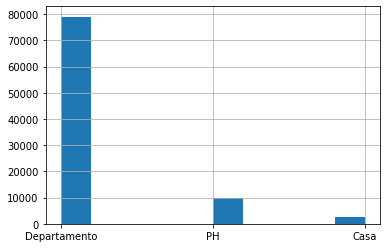

In [ ]:
hist=df["property_type"].hist(bins=10)

In [ ]:
df.drop(["surface_covered"], axis='columns', inplace=True)
df.drop(["surface_total"], axis='columns', inplace=True)

In [ ]:
df.head(1)

,start_date,end_date,created_on,lat,lon,l1,l2,l3,rooms,bedrooms,bathrooms,price,currency,title,description,property_type,operation_type,surface_total2,surface_covered2
0,2019-10-17,2019-12-23,2019-10-17,-34.60588,-58.384949,Argentina,Capital Federal,San Cristobal,7.0,7.0,2.0,153000.0,USD,"***Venta semipiso centro, ideal hostel*****",DESCRIPCION DE LA PROPIEDAD: Departamento de 1...,Departamento,Venta,140.0,140.0


### Vemos ahora cuáles y cuántos valores faltantes tiene nuestro dataset
> Le faltan:
> * 4548 valores a "Longitud" 
> * 4534 valores a "Latitud"
> * 2171 valores a "Baños"

In [ ]:
train_missing2= missing_values_table(df)
train_missing2

Your selected dataframe has 19 columns.
There are 3 columns that have missing values.


,Valores faltantes,% de Valores Totales
lon,4548,5.0
lat,4534,5.0
bathrooms,2171,2.4


### Lo que vamos a hacer es imputar los valores faltantes de latitud, longitud y baños
>Para imputar dichos valores faltantes lo que se hace es:
> * Se agrupa según el barrio para latitud y longitud. Y de acuerdo a la media se reemplazan los valores
> * Para la variable "Baños" se hace un promedio de los baños que hay en los diferentes tipos de propiedad según los barrios y se reemplazan dichos valores.

In [ ]:
%%time
print("Se imputan los valores")
df["lat"]=df.groupby(['l3'], sort=False)['lat'].apply(lambda x: x.fillna(x.mean()))
df["lon"]=df.groupby(["l3"], sort=False)["lon"].apply(lambda x: x.fillna(x.mean()))
df["bathrooms"]=df.groupby(["property_type","l3"], sort=False)["bathrooms"].apply(lambda x: x.fillna(x.mean()))  
#imp = SimpleImputer(strategy="most_frequent")
#imp.fit_transform(df[["bathrooms"]])
#df["bathrooms2"]=imp.fit_transform(df[["bathrooms"]])


Se imputan los valores
Wall time: 400 ms


### Ahora comprobamos si queda algún valor faltante

In [ ]:
Banull=df.bathrooms.isnull().groupby([df['rooms']]).sum().astype(int).reset_index(name='Nulos')
Banull

,rooms,Nulos
0,1.0,0
1,2.0,0
2,3.0,0
3,4.0,0
4,5.0,0
5,6.0,0
6,7.0,0
7,8.0,0
8,9.0,0
9,10.0,0


#### Si bien, no deja de ser algo aproximado, en este caso, lo más conveniente es utilizar ese método ya que con un simple imputer o con un KNN, podríamos estar rellenandolos con valores incorrectos.

In [ ]:
train_missing3= missing_values_table(df)
train_missing3

Your selected dataframe has 19 columns.
There are 0 columns that have missing values.


,Valores faltantes,% de Valores Totales


# Todos los valores faltantes fueron rellenados con éxito

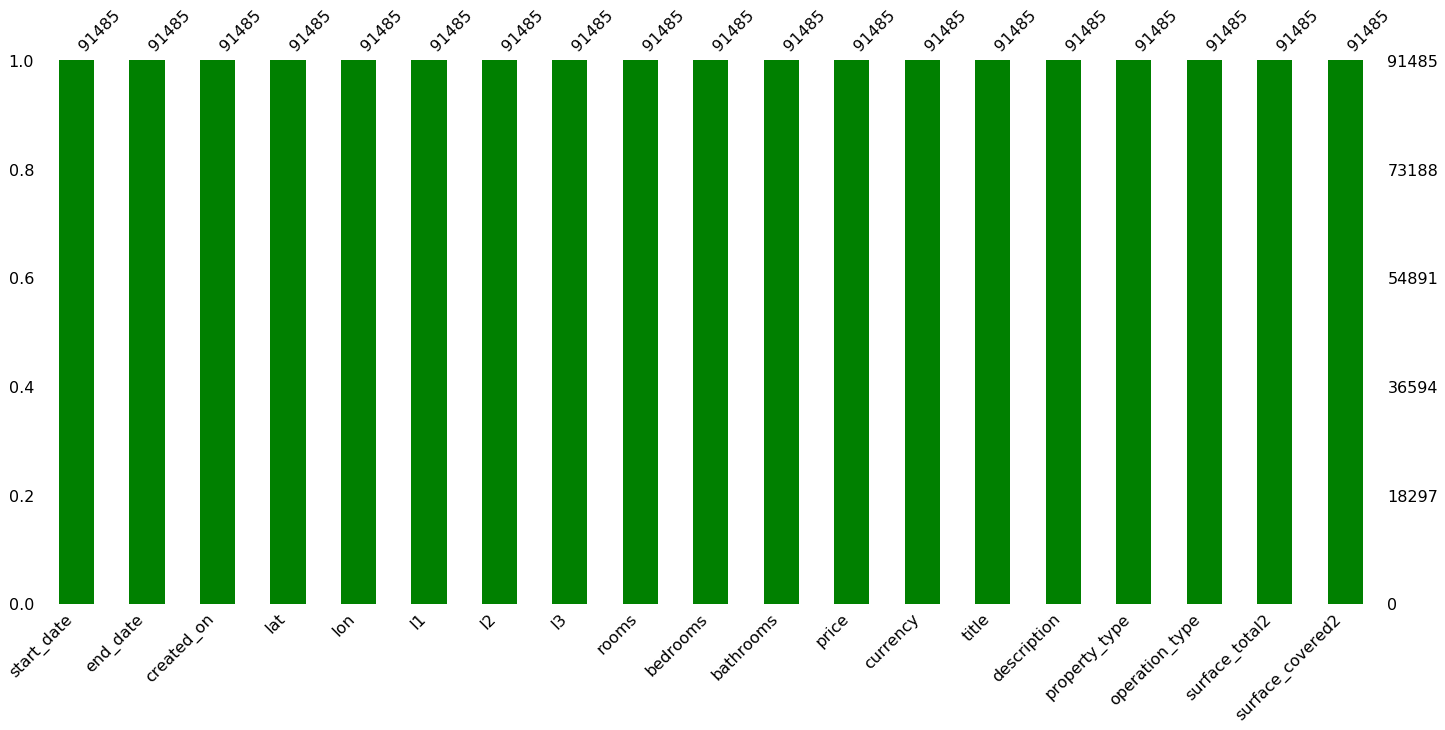

In [ ]:
msno.bar(df, color="G")

#### Parte A - Transformación de datos
* 1- Detección y eliminación de outliers
* 2- Encoding
* 3- Imputación de valores faltantes
* 4- Escalado de datos
* 5- Generación de nuevas variables predictoras/ reducción de dimensionalidad(SVD/PCA)

# Manejo de Outliers

<img src=https://cxl.com/wp-content/uploads/2017/01/outliers-in-data.jpeg>

#### 1- Detección y eliminación de outliers:
* A partir del siguiente boxplot podemos ver la cantidad de outliers que hay en los tipos de propiedades y en la superficie cubierta:

### DataFrame "Activo"= df

In [ ]:
#df.drop(["bathrooms"], axis='columns', inplace=True)
df.head(1)

,start_date,end_date,created_on,lat,lon,l1,l2,l3,rooms,bedrooms,bathrooms,price,currency,title,description,property_type,operation_type,surface_total2,surface_covered2
0,2019-10-17,2019-12-23,2019-10-17,-34.60588,-58.384949,Argentina,Capital Federal,San Cristobal,7.0,7.0,2.0,153000.0,USD,"***Venta semipiso centro, ideal hostel*****",DESCRIPCION DE LA PROPIEDAD: Departamento de 1...,Departamento,Venta,140.0,140.0


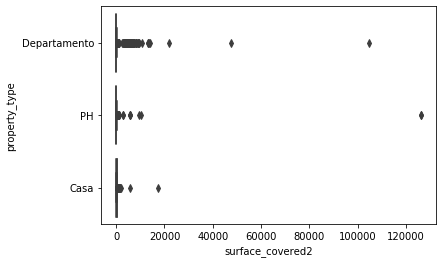

In [ ]:
sns.boxplot(data=df, x= "surface_covered2",y="property_type")

In [ ]:
superficietotal = df.surface_total2
precio = df.price
precio_m2 = precio/superficietotal
superficieminima = np.min(df.surface_total2)
superficieminima
superficiemax=np.max(df.surface_total2)
print("La propiedad más chica del dataset es : ", superficieminima)
print("La propiedad más grande del dataset es: ", superficiemax)
print("El metro cuadrado más caro de Argentina vale: ", np.max(precio_m2))

La propiedad más chica del dataset es :  10.0
La propiedad más grande del dataset es:  126062.0
El metro cuadrado más caro de Argentina vale:  754284.4651162791


> Podemos saber que los datos anteriores son incorrectos porque la propiedad más chica de Argentina tiene `29.9` mts de superficie total, según Wikipedia
>https://es.wikipedia.org/wiki/La_casa_m%C3%ADnima#:~:text=En%20la%20ciudad%20de%20Buenos,m%C3%A1s%20angosta%20de%20la%20ciudad. 
> Y la casa más grande (de Buenos Aires) tiene `17.915` de superficie total y `2.036` de metros cubieros, según la fuente:
> https://www.infoveloz.com/post/como-es-la-casa-mas-grande-de-la-ciudad-de-buenos-aires_117689#:~:text=La%20propiedad%2C%20llamada%20Villa%20Mart%C3%ADnez,a%20la%20Plaza%20San%20mart%C3%ADn.

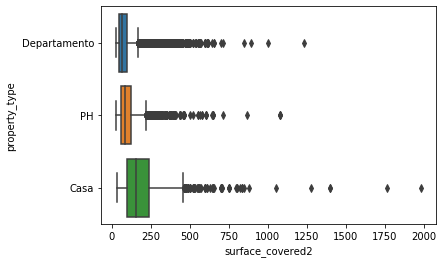

In [ ]:
df.drop(df[df.surface_covered2<29].index,inplace=True)
#df.drop(df[df.surface_covered2==1].index,inplace=True)
df.drop(df[df.surface_covered2>2036].index,inplace=True)
sns.boxplot(data=df, x= "surface_covered2",y="property_type")

(89202, 19)

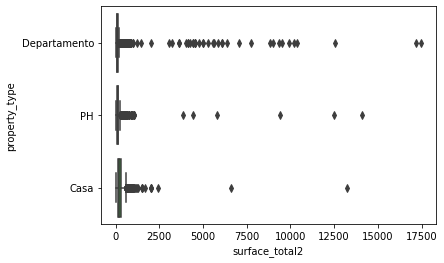

In [ ]:
df.drop(df[df.surface_total2<30].index,inplace=True)
#df.drop(df[df.surface_total2==1].index,inplace=True)
df.drop(df[df.surface_total2>17915].index,inplace=True)
sns.boxplot(data=df, x= "surface_total2",y="property_type")
df.shape

> Luego de ver el boxplot anterior, me doy cuenta de que hay un monton de datos de `superficie total` del tipo de propiedad `Departamentos` que están mal cargados, por lo que decidí eliminar todos esos valores mayores a 2039 mts de superficie total (que es el valor de la superficie cubierta máxima de una casa de Buenos Aires).
Dado que si yo dejo esos valores, me van a estar sesgando el modelo de predicción.

In [ ]:
df2=df.copy()

(89159, 19)

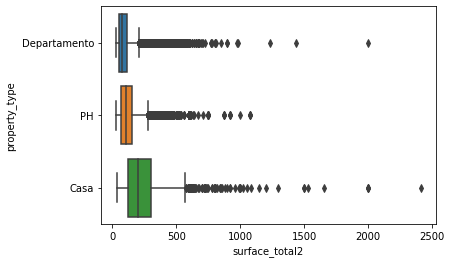

In [ ]:
df2.drop(df2[df2.surface_total2>2500].index,inplace=True)
sns.boxplot(data=df2, x= "surface_total2",y="property_type")
df2.shape

In [ ]:
df2["precio_sf2"]=df2.price/df2.surface_total2
df2.head(1)

,start_date,end_date,created_on,lat,lon,l1,l2,l3,rooms,bedrooms,bathrooms,price,currency,title,description,property_type,operation_type,surface_total2,surface_covered2,precio_sf2
0,2019-10-17,2019-12-23,2019-10-17,-34.60588,-58.384949,Argentina,Capital Federal,San Cristobal,7.0,7.0,2.0,153000.0,USD,"***Venta semipiso centro, ideal hostel*****",DESCRIPCION DE LA PROPIEDAD: Departamento de 1...,Departamento,Venta,140.0,140.0,1092.857143


> En el siguiente boxplot vemos que hay un departamento que tiene un outlier muy grande. Puede ser que el usuario que ingresó el precio de la casa, haya puesto uno muy elevado de manera aleatoria.
Por lo que vamos a eliminarlo.

Wall time: 227 ms


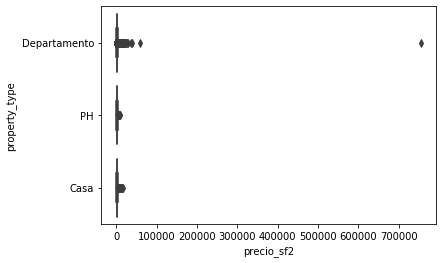

In [ ]:
%%time
sns.boxplot(data=df2, x= "precio_sf2",y="property_type")

In [ ]:
print("El promedio de precios por metro cuadrado de superficie es: ",df2.precio_sf2.mean())
print("El valor mínimo de metro cuadrado es: ",df2.precio_sf2.min())
print("El valor maximo de metro cuadrado es: ",df2.precio_sf2.max())

El promedio de precios por metro cuadrado de superficie es:  2676.1902227675623
El valor mínimo de metro cuadrado es:  17.647058823529413
El valor maximo de metro cuadrado es:  754284.4651162791


> En el siguiente paso, borramos todas las propiedades con un precio mayor a "754284" por superficie cuadrada

(89158, 20)

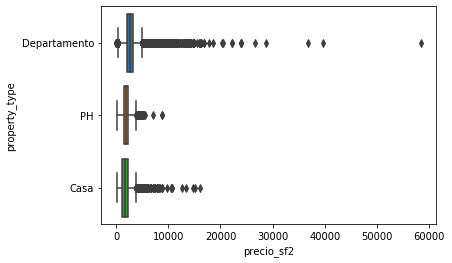

In [ ]:
df2.drop(df2[df2.precio_sf2>754284].index,inplace=True)
sns.boxplot(data=df2, x= "precio_sf2",y="property_type")
df2.shape

> Según varias fuentes los departamentos más caros se venden entre 8000 y 10000 dólares el metro cuadrado:
> * Ámbito: https://www.ambito.com/informacion-general/propiedad/los-3-departamentos-alquiler-mas-caros-la-ciudad-n5103863#:~:text=1%2D%20Departamento%20en%20Belgrano,la%20Ciudad%20de%20Buenos%20Aires.
> * Comunidad real estate: https://www.comunidadrealestate.com/noticias/cuanto-cuestan-los-departamentos-mas-caros-de-buenos-aires/
> * Diario la Nación: https://www.lanacion.com.ar/propiedades/lujo-porteno-asi-son-ocho-propiedades-venta-nid2183862/
> * El metro cuadrado más barato de Buenos Aires es 1549, según: Impulso Baires
https://www.impulsobaires.com.ar/nota/277685/el-precio-del-metro-cuadrado-en-gran-buenos-aires-es-hasta-un-32-mas-economico-que-en-capital-federal/#:~:text=Zona%20Norte,-Si%20se%20plantea&text=Y%2C%20finalmente%2C%20San%20Miguel%20(,cuadrado)%20son%20los%20m%C3%A1s%20baratos.

(77153, 20)

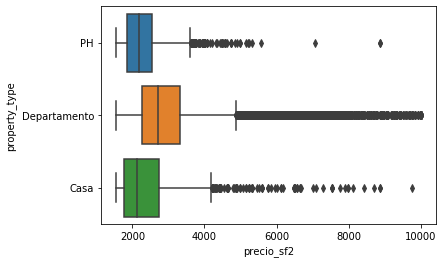

In [ ]:
df2.drop(df2[df2.precio_sf2>10000].index,inplace=True)
df2.drop(df2[df2.precio_sf2<=1549].index,inplace=True)
sns.boxplot(data=df2, x= "precio_sf2",y="property_type")
df2.shape

In [ ]:
print("El promedio de precios por metro cuadrado de superficie es: ",df2.precio_sf2.mean())
print("El valor mínimo de metro cuadrado es: ",df2.precio_sf2.min())
print("El valor maximo de metro cuadrado es: ",df2.precio_sf2.max())

El promedio de precios por metro cuadrado de superficie es:  2881.082941231968
El valor mínimo de metro cuadrado es:  1549.0196078431372
El valor maximo de metro cuadrado es:  10000.0


### Podemos ver en el siguiente gráfico como se distribuyen de mayor a menor los precios de las propiedades según un promedio del valor de venta
> Podemos ver que el barrio más caro es "Puerto Madero", lo cual tiene sentido,lo sabemos por experiencia previa, vista en los enlaces publicados en celdas anteriores.

Wall time: 2.48 s


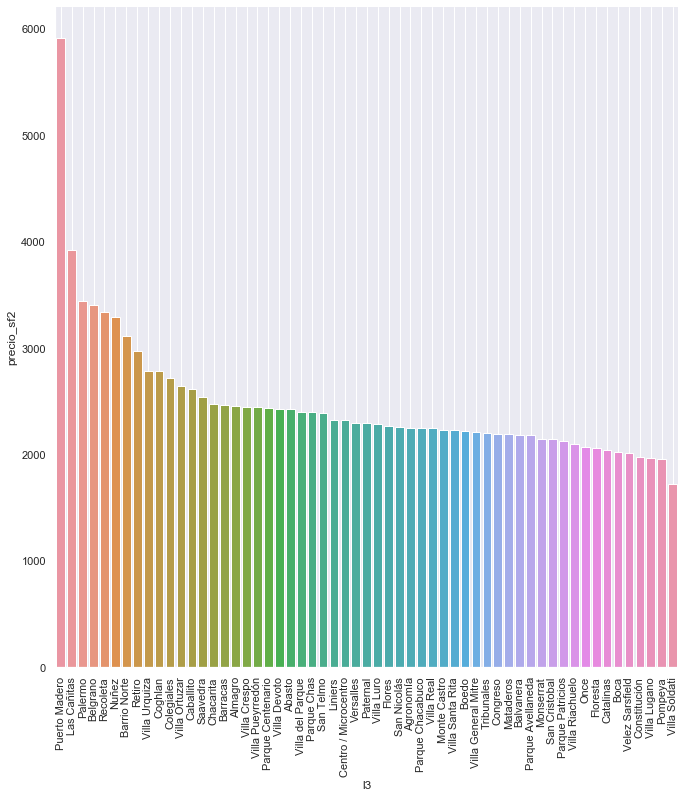

In [ ]:
%%time
plot_order = df2.groupby('l3').mean().sort_values("precio_sf2",ascending=False).index.values
sns.set(font_scale=1) 
sns.catplot(data=df2, x='l3',  y='precio_sf2',kind='bar',ci=None, legend_out=False, order=plot_order, height=10)   
plt.xticks(rotation = 90)
plt.grid()

> En el siguiente histograma mostramos la distribución de la superficie cubierta

Percentiles de superficie
Primer cuartil: 50.00
Tercer cuartil: 112.63
Rango intercuartílico: 62.63
AxesSubplot(0.125,0.125;0.775x0.755)


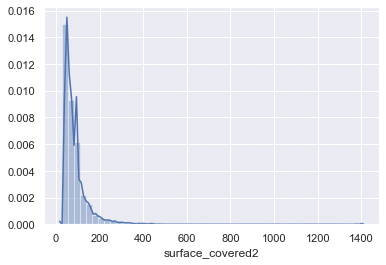

In [ ]:
df3=df2.copy()
Primer_quartil = np.nanpercentile(df3.surface_total2, 25)
Tercer_quartil = np.nanpercentile(df3.surface_total2, 75)
Inter_quartil = Tercer_quartil - Primer_quartil
print('Percentiles de superficie')
print('Primer cuartil: {:,.2f}'.format(Primer_quartil))
print('Tercer cuartil: {:,.2f}'.format(Tercer_quartil))
print('Rango intercuartílico: {:,.2f}'.format(Inter_quartil))
print(sns.distplot(df3.surface_covered2))

> En el siguiente histograma mostramos la distribución de la superficie total

AxesSubplot(0.125,0.125;0.775x0.755)


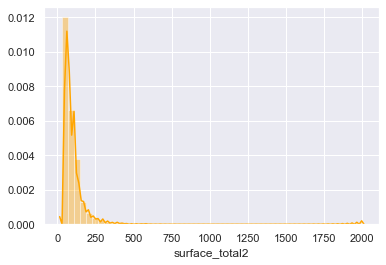

In [ ]:
print(sns.distplot(df3.surface_total2,color='Orange'))

# Ya está el filtrado de outliers
<img src=https://upload.wikimedia.org/wikipedia/commons/9/92/Sort_sol_pdfnet.jpg>

# ENCODING
> Df activo= df2

#### Esto nos sirve para saber como tratar los datos:
> * Mostramos en el siguiente cuadro si son datos cuantitativos o cualitativos
> * Luego a partir de eso, veremos como tratar dichos datos

In [ ]:
from pandas import DataFrame
cuanti = [f for f in df2.columns if df2.dtypes[f] != 'object']
cuali = [f for f in df2.columns if df2.dtypes[f] =="object"]
print("Las variables cuantitativas son: ", cuanti, sep="\n")
print("Las variables cualitativas son: ", cuali, sep="\n")
type(cuanti)

cuantitativo=pd.DataFrame(cuanti, columns=["Cuantitativos"])
nuevo=pd.DataFrame(cuali, columns=["Cualitativos"])
nuevo["Cuantitativos"]=cuantitativo
#datatyp = pd.DataFrame(d,columns=['First','Last','Age'])
#nuevo["Cuantitativos"]= DataFrame(cuanti,columns=['Cuantitativas'])
#datatyp["Cualitativos"]= DataFrame(cuali,columns=['Cuantitativas'])
nuevo

Las variables cuantitativas son: 
['lat', 'lon', 'rooms', 'bedrooms', 'bathrooms', 'price', 'surface_total2', 'surface_covered2', 'precio_sf2']
Las variables cualitativas son: 
['start_date', 'end_date', 'created_on', 'l1', 'l2', 'l3', 'currency', 'title', 'description', 'property_type', 'operation_type']


,Cualitativos,Cuantitativos
0,start_date,lat
1,end_date,lon
2,created_on,rooms
3,l1,bedrooms
4,l2,bathrooms
5,l3,price
6,currency,surface_total2
7,title,surface_covered2
8,description,precio_sf2
9,property_type,NaN


#### De momento, sé que los datos cualitativos no los puedo tratar como variables numéricas, por lo que no se puede aplicar ningún tipo de eliminación de datos por rango de valores.

In [ ]:
ptype=pd.get_dummies(df2,columns=["property_type"])
ptype.head(1)
barrioss=ptype["l3"].unique()
barrio3=pd.DataFrame(barrioss, columns=["Barrios"])
barrio3["Número asignado"]=['1','2','3','4','5','6','7','8','9','10','11','12','13','14','15','16','17','18','19','20','21','22','23','24','25','26','27','28','29','30','31','32','33','34','35','36','37','38','39','40','41','42','43','44','45','46','47','48','49','50','51','52','53','54','55','56','57']#len(barrioss.tolist())
barrio3

,Barrios,Número asignado
0,Boedo,1
1,Palermo,2
2,Villa Crespo,3
3,Parque Patricios,4
4,Villa Pueyrredón,5
5,Abasto,6
6,Flores,7
7,Nuñez,8
8,Almagro,9
9,Belgrano,10


> Genero una lista con todas filas de barrios del dataframe "activo" que se está usando

In [ ]:
df2.shape

(77153, 20)

In [ ]:
listabarrios=df2["l3"].to_list()
print("La lista tiene: ",len(listabarrios))

La lista tiene:  77153


In [ ]:
columna=[]
for i in listabarrios:
    if i=='Boedo':
        x=1
        columna.append(x)
    if i=='Palermo':
        x=2
        columna.append(x)
    if i=='Villa Crespo':
        x=3
        columna.append(x)
    if i=='Parque Patricios':
        x=4
        columna.append(x)
    if i=='Villa Pueyrredón':
        x=5
        columna.append(x)
    if i=='Abasto':
        x=6
        columna.append(x)
    if i=='Flores':
        x=7
        columna.append(x)
    if i=='Nuñez':
        x=8
        columna.append(x)
    if i=='Almagro':
        x=9
        columna.append(x)
    if i=='Belgrano':
        x=10
        columna.append(x)
    if i=='Floresta':
        x=11
        columna.append(x)
    if i=='Recoleta':
        x=12
        columna.append(x)
    if i=='Balvanera':
        x=13
        columna.append(x)
    if i=='Caballito':
        x=14       
        columna.append(x)
    if i=='Chacarita':
        x=15
        columna.append(x)
    if i=='San Telmo':
        x=16
        columna.append(x)
    if i=='Colegiales':
        x=17
        columna.append(x)
    if i=='Villa Luro':
        x=18
        columna.append(x)
    if i=='Barrio Norte':
        x=19
        columna.append(x)
    if i=='Las Cañitas':
        x=20
        columna.append(x)
    if i=='San Nicolás':
        x=21
        columna.append(x)
    if i=='Villa Urquiza':
        x=22
        columna.append(x)
    if i=='Parque Centenario':
        x=23
        columna.append(x)
    if i=='Villa General Mitre':
        x=24
        columna.append(x)
    if i=='Boca':
        x=25
        columna.append(x)
    if i=='Once':
        x=26
        columna.append(x)
    if i=='Retiro':
        x=27
        columna.append(x)
    if i=='Monserrat':
        x=28
        columna.append(x)
    if i=='Puerto Madero':
        x=29
        columna.append(x)
    if i=='San Cristobal':
        x=30
        columna.append(x)
    if i=='Villa Ortuzar':
        x=31
        columna.append(x)
    if i=='Parque Chacabuco':
        x=32
        columna.append(x)
    if i=='Centro / Microcentro':
        x=33
        columna.append(x)
    if i=='Liniers':
        x=34
        columna.append(x)
    if i=='Coghlan':
        x=35
        columna.append(x)
    if i=='Paternal':
        x=36
        columna.append(x)
    if i=='Saavedra':
        x=37
        columna.append(x)
    if i=='Villa Santa Rita':
        x=38
        columna.append(x)
    if i=='Barracas':
        x=39
        columna.append(x)
    if i=='Villa Devoto':
        x=40
        columna.append(x)
    if i=='Villa del Parque':
        x=41
        columna.append(x)
    if i=='Mataderos':
        x=42
        columna.append(x)
    if i=='Monte Castro':
        x=43
        columna.append(x)
    if i=='Constitución':
        x=44
        columna.append(x)
    if i=='Parque Avellaneda':
        x=45
        columna.append(x)
    if i=='Congreso':
        x=46
        columna.append(x)
    if i=='Tribunales':
        x=47
        columna.append(x)
    if i=='Velez Sarsfield':
        x=48
        columna.append(x)
    if i=='Parque Chas':
        x=49
        columna.append(x)
    if i=='Versalles':
        x=50
        columna.append(x)
    if i=='Agronomía':
        x=51
        columna.append(x)
    if i=='Villa Lugano':
        x=52
        columna.append(x)
    if i=='Pompeya':
        x=53
        columna.append(x)
    if i=='Villa Real':
        x=54
        columna.append(x)
    if i=='Catalinas':
        x=55
        columna.append(x)
    if i=='Villa Riachuelo':
        x=56
        columna.append(x)
    if i=='Villa Soldati':
        x=57
        columna.append(x)
print("La columna tiene: ",len(columna))

La columna tiene:  77153


> Encoding de barrios, de variable categórica a numérica. Cada barrio tiene un número asignado, dado que son `57` barrios únicos.
Toman los siguientes valores:

In [ ]:
df2["BarriosEncodeados"]=columna
df2.head(1)
##Acá ya podría borrar la variable de barrios, o la dejo, pero ya para entrenar el modelo,
#puedo pasarle como feature de entrenamiento los barrios encodeados

,start_date,end_date,created_on,lat,lon,l1,l2,l3,rooms,bedrooms,...,price,currency,title,description,property_type,operation_type,surface_total2,surface_covered2,precio_sf2,BarriosEncodeados
1,2019-10-17,2019-11-21,2019-10-17,-34.624056,-58.41211,Argentina,Capital Federal,Boedo,2.0,1.0,...,159000.0,USD,Espectacular PH reciclado en Boedo sin expensas.,PH reciclado en Boedo a una cuadra de la plaz...,PH,Venta,70.0,58.0,2271.428571,1


In [ ]:
proptip=df2["property_type"].unique()
pilitype=pd.DataFrame(proptip, columns=["Tipo de Propiedad"])
pilitype["Número asignado"]=['1','2','3']#len(barrioss.tolist())
pilitype

,Tipo de Propiedad,Número asignado
0,PH,1
1,Departamento,2
2,Casa,3


In [ ]:
tipopropiedad=df2["property_type"].to_list()
#tipopropiedad2=df2["property_type"].unique()
#tipopropiedad

In [ ]:
pili=[]
for j in tipopropiedad:
    if j =='PH':
        y=1
        pili.append(y)
    if j=='Departamento':
        y=2
        pili.append(y)
    if j=='Casa':
        y=3
        pili.append(y)
#print(pili)

In [ ]:
df2["Tipo_Prop_Encodeada"]=pili
df2.head(5)

,start_date,end_date,created_on,lat,lon,l1,l2,l3,rooms,bedrooms,...,currency,title,description,property_type,operation_type,surface_total2,surface_covered2,precio_sf2,BarriosEncodeados,Tipo_Prop_Encodeada
1,2019-10-17,2019-11-21,2019-10-17,-34.624056,-58.412110,Argentina,Capital Federal,Boedo,2.0,1.0,...,USD,Espectacular PH reciclado en Boedo sin expensas.,PH reciclado en Boedo a una cuadra de la plaz...,PH,Venta,70.0,58.0,2271.428571,1,1
2,2019-10-17,2019-11-01,2019-10-17,-34.593569,-58.427474,Argentina,Capital Federal,Palermo,2.0,1.0,...,USD,Depto.tipo casa de 2 ambientes en Venta en Pal...,"2 ambienets amplio , excelente estado , patio ...",PH,Venta,45.0,45.0,2777.777778,2,1
3,2019-10-17,2019-12-23,2019-10-17,-34.581294,-58.436754,Argentina,Capital Federal,Palermo,2.0,1.0,...,USD,COSTA RICA 5800 / PALERMO HOLLYWOOD / VENTA PH...,HERMOSO PH EN PALERMO!!!2 AMBIENTES TOTALMENTE...,PH,Venta,85.0,50.0,3470.588235,2,1
5,2019-10-17,2019-11-01,2019-10-17,-34.593779,-58.441239,Argentina,Capital Federal,Villa Crespo,2.0,1.0,...,USD,Depto.tipo casa de 2 ambientes en Venta en Vil...,"Excelente ph solo 2 unidades, no paga expensas...",PH,Venta,56.0,56.0,2678.571429,3,1
6,2019-10-17,2019-10-31,2019-10-17,-34.600988,-58.433061,Argentina,Capital Federal,Villa Crespo,2.0,1.0,...,USD,Depto.tipo casa de 2 ambientes en Venta en Vil...,"Muy lindo PH, con terraza propia, 96m2! por es...",PH,Venta,70.0,70.0,2278.571429,3,1


## Listo el Encoding

### Ahora importamos las librerías para los modelos de predicción

In [ ]:
from sklearn.linear_model import LinearRegression
from sklearn import linear_model
from sklearn.tree import DecisionTreeRegressor
from sklearn.neighbors import KNeighborsRegressor
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
from sklearn.metrics import accuracy_score
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split

## Condiciones del proyecto 1

In [ ]:
datospr1= ((data.l2 == 'Capital Federal')&(data.property_type =='Casa')|(data.l2 == 'Capital Federal')&(data.property_type =='Departamento')| (data.l2 == 'Capital Federal')&(data.property_type =='PH')).copy()           

datospr1=data[datospr1].copy()
datospr1.shape

(91485, 19)

### En vez de imputar los valores directamente, borro todos los valores nulos.
### Ya que son los datos que pertenecen al proyecto 1

In [ ]:
datospr1=datospr1.dropna(axis=0)
datospr1.reset_index(drop=True,inplace=True)

In [ ]:
datospr1.shape


(76961, 19)

In [ ]:
datospr1.dtypes

start_date          object
end_date            object
created_on          object
lat                float64
lon                float64
l1                  object
l2                  object
l3                  object
rooms              float64
bedrooms           float64
bathrooms          float64
surface_total      float64
surface_covered    float64
price              float64
currency            object
title               object
description         object
property_type       object
operation_type      object
dtype: object

In [ ]:
datospr1.isna().sum()

start_date         0
end_date           0
created_on         0
lat                0
lon                0
l1                 0
l2                 0
l3                 0
rooms              0
bedrooms           0
bathrooms          0
surface_total      0
surface_covered    0
price              0
currency           0
title              0
description        0
property_type      0
operation_type     0
dtype: int64

### Reentrenamiento de los modelos del TP1

> * La variable a predecir es el precio
> * Se eije r2_score y mean_absolute_error

### Modelos de Predicción del TP1

In [ ]:
from sklearn.tree import DecisionTreeRegressor
from sklearn.neighbors import KNeighborsRegressor
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import r2_score
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
from numpy.random import randn
from sklearn.metrics import mean_squared_error
X_proyecto=df2.drop(['price','start_date','end_date','created_on','l1','l2','l3','currency','title','description','property_type','operation_type',],axis=1)                                                                                 
y_proyecto=df2['price']

X_train_proyecto, X_test_proyecto, y_train_proyecto, y_test_proyecto = train_test_split(X_proyecto, y_proyecto, test_size=0.30, random_state=42)


### DecisionTreeClassifier (TP1)
> Según lo calculado en el TP1, la profundidad recomendada es 15

In [ ]:
arbol_decision = DecisionTreeClassifier(max_depth=15, random_state=42)
arbol_decision.fit(X_train_proyecto, y_train_proyecto)
y_train_pred_proyecto = arbol_decision.predict(X_train_proyecto)
y_test_pred_proyecto = arbol_decision.predict(X_test_proyecto)
accuracytest = accuracy_score(y_test_proyecto, y_test_pred_proyecto)
accuracytrain = accuracy_score(y_train_proyecto, y_train_pred_proyecto)

In [ ]:
%%time
print(len(y_test_proyecto),len(y_test_pred_proyecto))
grafo=[]
for i in y_test_proyecto:
    for j in y_test_pred_proyecto:
        cal=i-j
    grafo.append(cal)
grafo

23146 23146
Wall time: 4min 44s


[-30000.0,
 75000.0,
 720000.0,
 210000.0,
 45000.0,
 195000.0,
 -58328.0,
 145000.0,
 45000.0,
 -30000.0,
 575000.0,
 40000.0,
 -27000.0,
 -36000.0,
 20000.0,
 595000.0,
 9000.0,
 -45000.0,
 1525000.0,
 65000.0,
 -57000.0,
 365000.0,
 -74000.0,
 30000.0,
 85000.0,
 -18000.0,
 275000.0,
 -25000.0,
 -60000.0,
 70000.0,
 204000.0,
 65000.0,
 34000.0,
 110000.0,
 -50000.0,
 -85100.0,
 -25000.0,
 113000.0,
 28000.0,
 735000.0,
 65000.0,
 175000.0,
 -30000.0,
 -35000.0,
 -15000.0,
 -78000.0,
 -84000.0,
 88416.0,
 8000.0,
 195000.0,
 80000.0,
 -60100.0,
 -7000.0,
 225000.0,
 265000.0,
 15000.0,
 -20000.0,
 305000.0,
 195000.0,
 341000.0,
 -65000.0,
 244350.0,
 -10000.0,
 1144000.0,
 24000.0,
 135000.0,
 20000.0,
 119999.0,
 110000.0,
 125000.0,
 95000.0,
 -53000.0,
 110000.0,
 -57500.0,
 225000.0,
 45000.0,
 215000.0,
 -61170.0,
 -73000.0,
 -40000.0,
 595000.0,
 67000.0,
 18000.0,
 -45000.0,
 102000.0,
 174000.0,
 12500.0,
 -82550.0,
 -57000.0,
 103000.0,
 95000.0,
 -70000.0,
 195000.0,
 960

In [ ]:
%%time
print(len(y_train_proyecto),len(y_train_pred_proyecto))
grafo2=[]
for i in y_test_proyecto:
    for j in y_test_pred_proyecto:
        cal=i-j
    grafo2.append(cal)
grafo2

54007 54007
Wall time: 4min 52s


[-30000.0,
 75000.0,
 720000.0,
 210000.0,
 45000.0,
 195000.0,
 -58328.0,
 145000.0,
 45000.0,
 -30000.0,
 575000.0,
 40000.0,
 -27000.0,
 -36000.0,
 20000.0,
 595000.0,
 9000.0,
 -45000.0,
 1525000.0,
 65000.0,
 -57000.0,
 365000.0,
 -74000.0,
 30000.0,
 85000.0,
 -18000.0,
 275000.0,
 -25000.0,
 -60000.0,
 70000.0,
 204000.0,
 65000.0,
 34000.0,
 110000.0,
 -50000.0,
 -85100.0,
 -25000.0,
 113000.0,
 28000.0,
 735000.0,
 65000.0,
 175000.0,
 -30000.0,
 -35000.0,
 -15000.0,
 -78000.0,
 -84000.0,
 88416.0,
 8000.0,
 195000.0,
 80000.0,
 -60100.0,
 -7000.0,
 225000.0,
 265000.0,
 15000.0,
 -20000.0,
 305000.0,
 195000.0,
 341000.0,
 -65000.0,
 244350.0,
 -10000.0,
 1144000.0,
 24000.0,
 135000.0,
 20000.0,
 119999.0,
 110000.0,
 125000.0,
 95000.0,
 -53000.0,
 110000.0,
 -57500.0,
 225000.0,
 45000.0,
 215000.0,
 -61170.0,
 -73000.0,
 -40000.0,
 595000.0,
 67000.0,
 18000.0,
 -45000.0,
 102000.0,
 174000.0,
 12500.0,
 -82550.0,
 -57000.0,
 103000.0,
 95000.0,
 -70000.0,
 195000.0,
 960

El r2 sobre el set de entrenamiento: 0.9825061312540976
El r2 sobre el set de evaluacion: 0.9810211976714405
La exactitutd de DecisionTreeClassifier sobre el set de test es :  0.6115959561047265
La exactitutd de DecisionTreeClassifier sobre el set de train es :  0.7312940915066566
El error absoluto medio sobre el set de entrenamiento: 5076.42450052771
El error absoluto medio sobre el set de evaluacion: 6958.318413548777
El RMSE sobre el set de entrenamiento es: 41068.574434226284
El RMSE sobre el set de evaluación es: 40548.91724686722



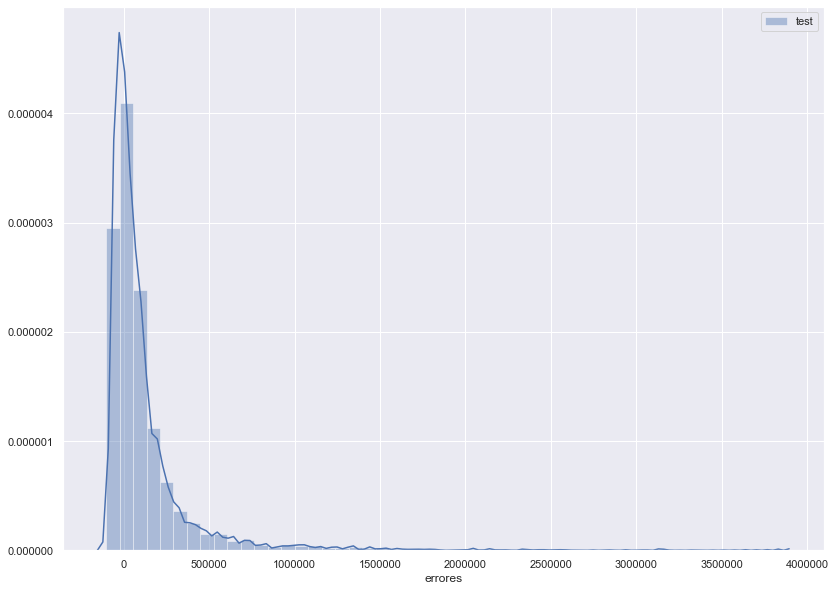

In [ ]:
train_maxe = r2_score(y_train_proyecto, y_train_pred_proyecto)
test_maxe = r2_score(y_test_proyecto, y_test_pred_proyecto)
print('El r2 sobre el set de entrenamiento:', train_maxe)
print('El r2 sobre el set de evaluacion:',test_maxe)
print('La exactitutd de DecisionTreeClassifier sobre el set de test es : ', accuracytest)
print('La exactitutd de DecisionTreeClassifier sobre el set de train es : ', accuracytrain)
train_mae = mean_absolute_error(y_train_proyecto, y_train_pred_proyecto)
test_mae = mean_absolute_error(y_test_proyecto, y_test_pred_proyecto)
print('El error absoluto medio sobre el set de entrenamiento:', train_mae)
print('El error absoluto medio sobre el set de evaluacion:',test_mae)
print ('El RMSE sobre el set de entrenamiento es:', np.sqrt(mean_squared_error(y_train_proyecto, y_train_pred_proyecto)))
print ('El RMSE sobre el set de evaluación es:', np.sqrt(mean_squared_error(y_test_proyecto, y_test_pred_proyecto)))         
print()

plt.figure(figsize = (30,10))

plt.subplot(1,2,1)
sns.distplot(np.array(grafo).reshape(-1,1), bins = 50, label = 'test')
plt.xlabel('errores')
plt.legend()

### Reentrenamiento de los modelos del TP1
### Vecinos Cercanos (TP1)
> Según lo calculado en el TP1, lo recomendable es usar 10 vecinos cercanos

> * La variable a predecir es el precio 
> * Se eije r2_score y mean_absolute_error

In [ ]:
X_proyecto2=df2.drop(['price','start_date','end_date','created_on','l1','l2','l3','currency','title','description','property_type','operation_type',],axis=1)                                                                                 
y_proyecto2=df2['price']

X_train_proyecto2, X_test_proyecto2, y_train_proyecto2, y_test_proyecto2 = train_test_split(X_proyecto2, y_proyecto2, test_size=0.30, random_state=42)


In [ ]:
vecinos_cercanos = KNeighborsClassifier(n_neighbors=10,weights='distance',p=1)
vecinos_cercanos.fit(X_train_proyecto2, y_train_proyecto2)
y_train_pred_proyecto2 = vecinos_cercanos.predict(X_train_proyecto2)
y_test_pred_proyecto2 = vecinos_cercanos.predict(X_test_proyecto2)

In [ ]:
print('Accuracy of K-NN classifier on training set: {:.2f}'
     .format(vecinos_cercanos.score(X_train_proyecto2, y_train_proyecto2)))
print('Accuracy of K-NN classifier on test set: {:.2f}'
     .format(vecinos_cercanos.score(X_test_proyecto2, y_test_proyecto2)))

Accuracy of K-NN classifier on training set: 1.00
Accuracy of K-NN classifier on test set: 0.70


#### Calculamos el accuracy_score
>Definimos la exactitud (accuracy en inglés) como el ratio entre las predicciones correctas (suma de verdaderos positivos y verdaderos negativos) y las predicciones totales. Scikit-Learn implementa la métrica sklearn.metrics.accuracy_score que puede utilizarse en clasificación binomial y multiclase y que devuelve el porcentaje de predicciones correctas. Lógicamente, el clasificador ideal tendría una exactitud de 1 (todas las muestras serían bien clasificadas) y el peor clasificador posible tendría una exactitud de 0 (ninguna muestra sería bien clasificada).

In [ ]:
accuracyKNtest = accuracy_score(y_test_proyecto2, y_test_pred_proyecto2)
accuracyKNtrain = accuracy_score(y_train_proyecto2, y_train_pred_proyecto2)

In [ ]:
%%time
print(len(y_train_proyecto),len(y_train_pred_proyecto))
grafo3=[]
for i in y_test_proyecto:
    for j in y_test_pred_proyecto:
        cal=i-j
    grafo3.append(cal)
grafo3

54007 54007
Wall time: 4min 36s


[-55000.0,
 50000.0,
 695000.0,
 185000.0,
 20000.0,
 170000.0,
 -83328.0,
 120000.0,
 20000.0,
 -55000.0,
 550000.0,
 15000.0,
 -52000.0,
 -61000.0,
 -5000.0,
 570000.0,
 -16000.0,
 -70000.0,
 1500000.0,
 40000.0,
 -82000.0,
 340000.0,
 -99000.0,
 5000.0,
 60000.0,
 -43000.0,
 250000.0,
 -50000.0,
 -85000.0,
 45000.0,
 179000.0,
 40000.0,
 9000.0,
 85000.0,
 -75000.0,
 -110100.0,
 -50000.0,
 88000.0,
 3000.0,
 710000.0,
 40000.0,
 150000.0,
 -55000.0,
 -60000.0,
 -40000.0,
 -103000.0,
 -109000.0,
 63416.0,
 -17000.0,
 170000.0,
 55000.0,
 -85100.0,
 -32000.0,
 200000.0,
 240000.0,
 -10000.0,
 -45000.0,
 280000.0,
 170000.0,
 316000.0,
 -90000.0,
 219350.0,
 -35000.0,
 1119000.0,
 -1000.0,
 110000.0,
 -5000.0,
 94999.0,
 85000.0,
 100000.0,
 70000.0,
 -78000.0,
 85000.0,
 -82500.0,
 200000.0,
 20000.0,
 190000.0,
 -86170.0,
 -98000.0,
 -65000.0,
 570000.0,
 42000.0,
 -7000.0,
 -70000.0,
 77000.0,
 149000.0,
 -12500.0,
 -107550.0,
 -82000.0,
 78000.0,
 70000.0,
 -95000.0,
 170000.0,
 71

In [ ]:
%%time
print(len(y_test_proyecto),len(y_test_pred_proyecto))
grafo4=[]
for i in y_test_proyecto:
    for j in y_test_pred_proyecto:
        cal=i-j
    grafo4.append(cal)
grafo4

23146 23146
Wall time: 4min 32s


[-55000.0,
 50000.0,
 695000.0,
 185000.0,
 20000.0,
 170000.0,
 -83328.0,
 120000.0,
 20000.0,
 -55000.0,
 550000.0,
 15000.0,
 -52000.0,
 -61000.0,
 -5000.0,
 570000.0,
 -16000.0,
 -70000.0,
 1500000.0,
 40000.0,
 -82000.0,
 340000.0,
 -99000.0,
 5000.0,
 60000.0,
 -43000.0,
 250000.0,
 -50000.0,
 -85000.0,
 45000.0,
 179000.0,
 40000.0,
 9000.0,
 85000.0,
 -75000.0,
 -110100.0,
 -50000.0,
 88000.0,
 3000.0,
 710000.0,
 40000.0,
 150000.0,
 -55000.0,
 -60000.0,
 -40000.0,
 -103000.0,
 -109000.0,
 63416.0,
 -17000.0,
 170000.0,
 55000.0,
 -85100.0,
 -32000.0,
 200000.0,
 240000.0,
 -10000.0,
 -45000.0,
 280000.0,
 170000.0,
 316000.0,
 -90000.0,
 219350.0,
 -35000.0,
 1119000.0,
 -1000.0,
 110000.0,
 -5000.0,
 94999.0,
 85000.0,
 100000.0,
 70000.0,
 -78000.0,
 85000.0,
 -82500.0,
 200000.0,
 20000.0,
 190000.0,
 -86170.0,
 -98000.0,
 -65000.0,
 570000.0,
 42000.0,
 -7000.0,
 -70000.0,
 77000.0,
 149000.0,
 -12500.0,
 -107550.0,
 -82000.0,
 78000.0,
 70000.0,
 -95000.0,
 170000.0,
 71

El r2 sobre el set de entrenamiento: 1.0
El r2 sobre el set de evaluacion: 0.9894957128149074
La exactitud de K-NN classifier sobre el set de test es:  0.6986952389181716
La exactitud de K-NN classifier sobre el set de train es:  1.0
El error absoluto medio sobre el set de entrenamiento: 0.0
El error absoluto medio sobre el set de evaluacion: 5740.811025663182
El RMSE sobre el set de entrenamiento es: 0.0
El RMSE sobre el set de evaluación es: 30166.724295876982



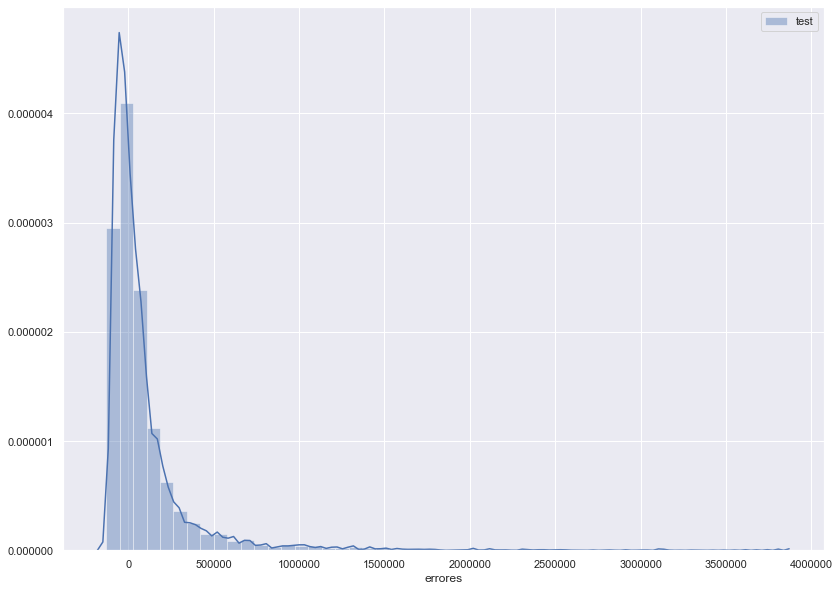

In [ ]:
train_maxe = r2_score(y_train_proyecto2, y_train_pred_proyecto2)
test_maxe = r2_score(y_test_proyecto2, y_test_pred_proyecto2)
print('El r2 sobre el set de entrenamiento:', train_maxe)
print('El r2 sobre el set de evaluacion:',test_maxe)
print('La exactitud de K-NN classifier sobre el set de test es: ', accuracyKNtest)
print('La exactitud de K-NN classifier sobre el set de train es: ', accuracyKNtrain)
train_mae = mean_absolute_error(y_train_proyecto2, y_train_pred_proyecto2)
test_mae = mean_absolute_error(y_test_proyecto2, y_test_pred_proyecto2)
print('El error absoluto medio sobre el set de entrenamiento:', train_mae)
print('El error absoluto medio sobre el set de evaluacion:',test_mae)
print ('El RMSE sobre el set de entrenamiento es:', np.sqrt(mean_squared_error(y_train_proyecto2, y_train_pred_proyecto2)))
print ('El RMSE sobre el set de evaluación es:', np.sqrt(mean_squared_error(y_test_proyecto2, y_test_pred_proyecto2)))        

print()



plt.figure(figsize = (30,10))

plt.subplot(1,2,1)
sns.distplot(np.array(grafo4).reshape(-1,1), bins = 50, label = 'test')
#sns.distplot((y_train_proyecto) -(y_train_pred_proyecto).reshape(-1,1), bins = 50, label = 'test')

plt.xlabel('errores')
plt.legend()

### Ahora genero los mismos modelos de predicción para el dataset previamente trabajado (TP2)

In [ ]:
df2.dtypes

start_date              object
end_date                object
created_on              object
lat                    float64
lon                    float64
l1                      object
l2                      object
l3                      object
rooms                  float64
bedrooms               float64
bathrooms              float64
price                  float64
currency                object
title                   object
description             object
property_type           object
operation_type          object
surface_total2         float64
surface_covered2       float64
precio_sf2             float64
BarriosEncodeados      float64
Tipo_Prop_Encodeada    float64
BarriosEncodeados2     float64
dtype: object

In [ ]:
#Otra forma de hacer el entrenamiento de datos:


#X2=df2.loc[:,['lat','lon','rooms','bedrooms','bathdrooms','surface_total2','surface_covered2','precio_sf2','BarriosEncodeados','Tipo_Prop_Encodeada']]                                                                              
#y2=df2.loc[:,['price']]
#X_train3, X_test3, y_train3, y_test3 = train_test_split(X2, y2, test_size = 0.30, random_state = 42)
#X2.head(5)

In [ ]:
X2=df2.drop(['price','start_date','end_date','created_on','l1','l2','l3','currency','title','description','property_type','operation_type',],axis=1)                                                                                 
y2=df2['price']
X_train3, X_test3, y_train3, y_test3 = train_test_split(X2, y2, test_size = 0.30, random_state = 42)
X2.head(5)

,lat,lon,rooms,bedrooms,bathrooms,surface_total2,surface_covered2,precio_sf2,BarriosEncodeados,Tipo_Prop_Encodeada
1,-34.624056,-58.412110,2.0,1.0,2.0,70.0,58.0,2271.428571,1,1
2,-34.593569,-58.427474,2.0,1.0,1.0,45.0,45.0,2777.777778,2,1
3,-34.581294,-58.436754,2.0,1.0,1.0,85.0,50.0,3470.588235,2,1
5,-34.593779,-58.441239,2.0,1.0,1.0,56.0,56.0,2678.571429,3,1
6,-34.600988,-58.433061,2.0,1.0,1.0,70.0,70.0,2278.571429,3,1


# Modelos: Vecinos cercanos (TP2)

> Ahora realizo el análisis para el modelo de KNN classifier, me fijo la cantidad de vecinos cercanos que más me conviene

In [ ]:
%%time
lista_accuracy_train = []
lista_accuracy_test = []

# Definimos la lista de valores de k que vamos a explorar
k_vecinos = [1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,20,25,30,35,40,50]

# Generamos en loop sobre los distintos valores de k 
for k in k_vecinos:
    
    # Vamos a repetir el siguiente bloque de código
    
    # Definir el modelo con el valor de vecinos deseado
    clf = KNeighborsClassifier(n_neighbors=k)
    
    # Entrenar el modelo
    clf.fit(X_train3,y_train3)
    
    # Predecir y evaluar sobre el set de entrenamiento
    y_train_pred3 = clf.predict(X_train3)
    train_acc3 = accuracy_score(y_train3, y_train_pred3)
    
    # Predecir y evaluar sobre el set de evaluación
    y_test_pred3 = clf.predict(X_test3)
    test_acc3 = accuracy_score(y_test3, y_test_pred3)
    
    # Agregar la información a las listas
    lista_accuracy_train.append(train_acc3)
    lista_accuracy_test.append(test_acc3)




#X = x.reshape(-1,1)

Wall time: 3min 55s


In [ ]:
print(lista_accuracy_train)
print(lista_accuracy_test)

[1.0, 0.8338919029014757, 0.7505693706371396, 0.698539078267632, 0.6617845834799193, 0.6275482807784176, 0.602477456625993, 0.5783879867424593, 0.5585016757087045, 0.5405780732127317, 0.5238765345233025, 0.5080082211565168, 0.4963245505212287, 0.48549262132686505, 0.47399411187438667, 0.4303331049678745, 0.3960968022663729, 0.367581980113689, 0.34710315329494323, 0.32673542318588333, 0.2955727961190216]
[0.6836602436706126, 0.594271148362568, 0.555041907889052, 0.5300699904951179, 0.5130044068089519, 0.4971053313747516, 0.48293441631383394, 0.4701460295515424, 0.456839194677266, 0.44677266050289466, 0.43558282208588955, 0.42625075607016333, 0.41847403439039144, 0.4106541087012875, 0.40317981508684003, 0.3753996370863216, 0.34956363950574615, 0.32709755465307183, 0.31046401106022636, 0.29197269506610213, 0.2680376738961376]


### Vemos analítcamente la distancia entre los vecinos

> Calculamos la distancia entre los dos puntos

In [ ]:
listanueva=[]
for i in lista_accuracy_train:
    for j in lista_accuracy_test:
        valor=i-j
    listanueva.append(valor)
    
print(len(listanueva),listanueva)

listanueva=pd.DataFrame(listanueva, columns=["Resta"])
listanueva["K_vecinos(x)"]=[1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,20,25,30,35,40,50]
listanueva['lista_accuracy_train (y)']=[1.0, 0.8338919029014757, 0.7505693706371396, 0.698539078267632, 0.6617845834799193, 0.6275482807784176, 0.602477456625993, 0.5783879867424593, 0.5585016757087045, 0.5405780732127317, 0.5238765345233025, 0.5080082211565168, 0.4963245505212287, 0.48549262132686505, 0.47399411187438667, 0.4303331049678745, 0.3960968022663729, 0.367581980113689, 0.34710315329494323, 0.32673542318588333, 0.2955727961190216]
listanueva['lista_accuracy_test (y)']=[0.6836602436706126, 0.594271148362568, 0.555041907889052, 0.5300699904951179, 0.5130044068089519, 0.4971053313747516, 0.48293441631383394, 0.4701460295515424, 0.456839194677266, 0.44677266050289466, 0.43558282208588955, 0.42625075607016333, 0.41847403439039144, 0.4106541087012875, 0.40317981508684003, 0.3753996370863216, 0.34956363950574615, 0.32709755465307183, 0.31046401106022636, 0.29197269506610213, 0.2680376738961376]
listanueva

21 [0.7319623261038624, 0.5658542290053381, 0.482531696741002, 0.43050140437149437, 0.3937469095837817, 0.35951060688228004, 0.33443978272985536, 0.3103503128463217, 0.2904640018125669, 0.2725403993165941, 0.25583886062716493, 0.2399705472603792, 0.22828687662509112, 0.21745494743072746, 0.20595643797824909, 0.16229543107173694, 0.1280591283702353, 0.09954430621755139, 0.07906547939880565, 0.05869774928974575, 0.027535122222884012]


,Resta,K_vecinos(x),lista_accuracy_train (y),lista_accuracy_test (y)
0,0.731962,1,1.000000,0.683660
1,0.565854,2,0.833892,0.594271
2,0.482532,3,0.750569,0.555042
3,0.430501,4,0.698539,0.530070
4,0.393747,5,0.661785,0.513004
5,0.359511,6,0.627548,0.497105
6,0.334440,7,0.602477,0.482934
7,0.310350,8,0.578388,0.470146
8,0.290464,9,0.558502,0.456839
9,0.272540,10,0.540578,0.446773


# Tomamos 11 vecinos cercanos
> Analizamos la exactitud del modelo con 11 vecinos cercanos

In [ ]:
clf_knn = KNeighborsClassifier(n_neighbors=11)
    
# Entrenar el modelo
clf_knn.fit(X_train3,y_train3)
# Predecir y evaluar sobre el set de entrenamiento
y_train_pred3 = clf_knn.predict(X_train3)
train_acc = accuracy_score(y_train3, y_train_pred3)
y_test_pred3 = clf_knn.predict(X_test3)
test_acc = accuracy_score(y_test3, y_test_pred3)
print('Porcentaje de aciertos sobre el set de entrenamiento:', train_acc)
print('Porcentaje de aciertos sobre el set de evaluación:',test_acc)

Porcentaje de aciertos sobre el set de entrenamiento: 0.5238765345233025
Porcentaje de aciertos sobre el set de evaluación: 0.43558282208588955


### Vemos gráficamente la distancia entre los vecinos cercanos

Text(0, 0.5, 'Exactitud')

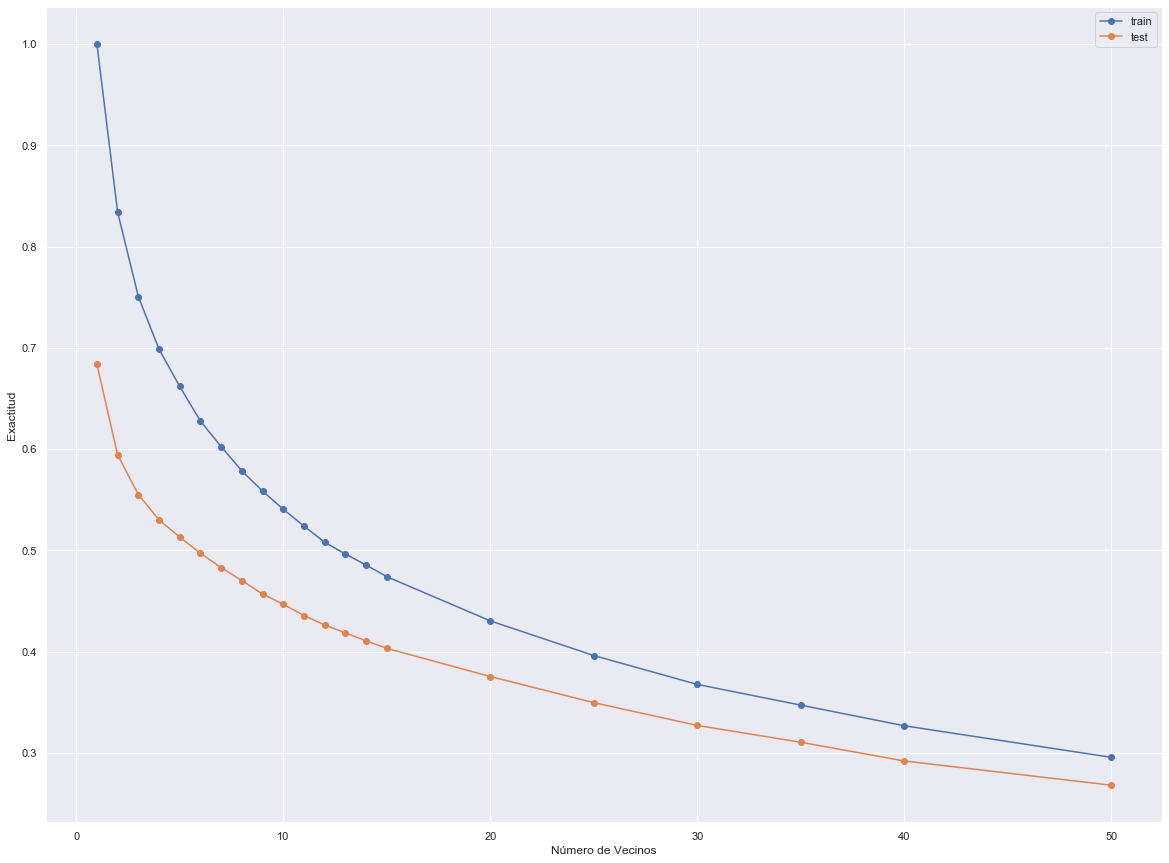

In [ ]:
plt.figure(figsize=(20,15))
plt.plot(k_vecinos,lista_accuracy_train,'o-',label='train')
plt.plot(k_vecinos,lista_accuracy_test,'o-',label='test')
#plt.plot(k_vecinos,listanueva,'--',label='resta')

plt.legend()
plt.xlabel('Número de Vecinos')
plt.ylabel('Exactitud')

### Calculo de error para vecinos cercanos

In [ ]:
%%time
print(len(y_test3),len(y_test_pred3))
calculo=[]
for i in y_test3:
    for j in y_test_pred3:
        cal=i-j
    calculo.append(cal)
calculo    

23146 23146
Wall time: 4min 31s


[-55000.0,
 50000.0,
 695000.0,
 185000.0,
 20000.0,
 170000.0,
 -83328.0,
 120000.0,
 20000.0,
 -55000.0,
 550000.0,
 15000.0,
 -52000.0,
 -61000.0,
 -5000.0,
 570000.0,
 -16000.0,
 -70000.0,
 1500000.0,
 40000.0,
 -82000.0,
 340000.0,
 -99000.0,
 5000.0,
 60000.0,
 -43000.0,
 250000.0,
 -50000.0,
 -85000.0,
 45000.0,
 179000.0,
 40000.0,
 9000.0,
 85000.0,
 -75000.0,
 -110100.0,
 -50000.0,
 88000.0,
 3000.0,
 710000.0,
 40000.0,
 150000.0,
 -55000.0,
 -60000.0,
 -40000.0,
 -103000.0,
 -109000.0,
 63416.0,
 -17000.0,
 170000.0,
 55000.0,
 -85100.0,
 -32000.0,
 200000.0,
 240000.0,
 -10000.0,
 -45000.0,
 280000.0,
 170000.0,
 316000.0,
 -90000.0,
 219350.0,
 -35000.0,
 1119000.0,
 -1000.0,
 110000.0,
 -5000.0,
 94999.0,
 85000.0,
 100000.0,
 70000.0,
 -78000.0,
 85000.0,
 -82500.0,
 200000.0,
 20000.0,
 190000.0,
 -86170.0,
 -98000.0,
 -65000.0,
 570000.0,
 42000.0,
 -7000.0,
 -70000.0,
 77000.0,
 149000.0,
 -12500.0,
 -107550.0,
 -82000.0,
 78000.0,
 70000.0,
 -95000.0,
 170000.0,
 71

In [ ]:
%time
calculo3=[]
for i in np.array(y_train3):
    for j in np.array(y_train_pred3):
        cal=i-j
    calculo3.append(cal)
calculo3    

Wall time: 0 ns


[535007.0,
 220000.0,
 499500.0,
 235000.0,
 150000.0,
 -15000.0,
 574000.0,
 175000.0,
 515000.0,
 -30000.0,
 315000.0,
 90000.0,
 113000.0,
 -21000.0,
 15000.0,
 -22427.0,
 -18000.0,
 124400.0,
 44000.0,
 85000.0,
 48000.0,
 4000.0,
 15000.0,
 425000.0,
 15000.0,
 15000.0,
 105000.0,
 -12000.0,
 0.0,
 63000.0,
 325000.0,
 -62100.0,
 -10000.0,
 95000.0,
 195000.0,
 225000.0,
 5000.0,
 175000.0,
 -10000.0,
 4000.0,
 -12000.0,
 1275000.0,
 150000.0,
 82000.0,
 225000.0,
 50000.0,
 455000.0,
 60000.0,
 200800.0,
 75000.0,
 45000.0,
 110000.0,
 455000.0,
 25000.0,
 144000.0,
 -35100.0,
 67000.0,
 144000.0,
 44000.0,
 -40000.0,
 -20000.0,
 155000.0,
 -15000.0,
 -21424.0,
 785000.0,
 71500.0,
 74900.0,
 43000.0,
 38000.0,
 145000.0,
 12632.0,
 345000.0,
 475000.0,
 1774000.0,
 140000.0,
 20000.0,
 -41000.0,
 224000.0,
 -28000.0,
 625000.0,
 150000.0,
 525000.0,
 14500.0,
 168000.0,
 274100.0,
 44000.0,
 254900.0,
 193967.0,
 63000.0,
 130000.0,
 305000.0,
 -30000.0,
 94000.0,
 755000.0,
 27

# Gráfica de distribución de errores para Vecinos cercanos

El r2 sobre el set de entrenamiento: 1.0
El r2 sobre el set de evaluacion: 0.9893441470276033
El error absoluto medio sobre el set de entrenamiento: 0.0
El error absoluto medio sobre el set de evaluacion: 5838.92305365938
El porcentaje de aciertos sobre el set de entrenamiento es:  0.5238765345233025
El porcentaje de aciertos sobre el set de evaluación es:  0.43558282208588955
RMSE (en Train): 0.0
RMSE (en Test): 30383.581851403367



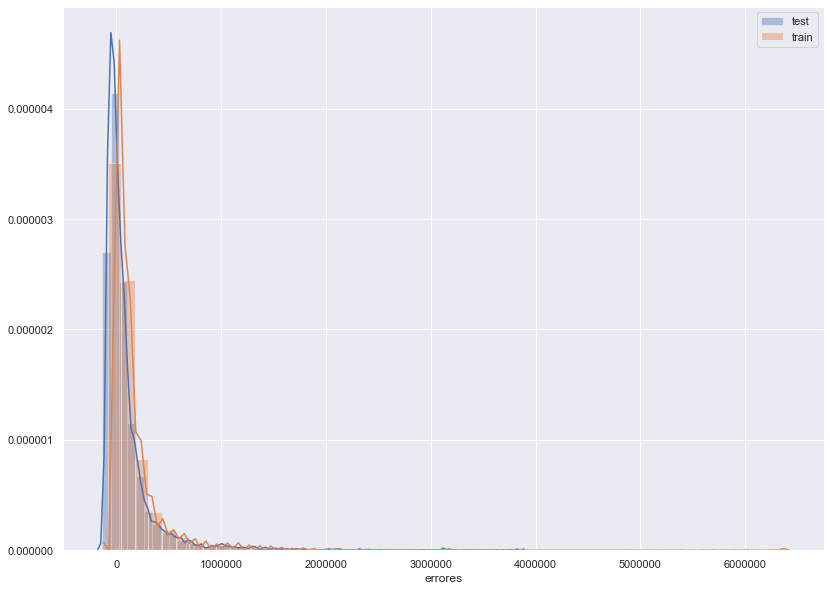

In [ ]:
#X_train3, X_test3, y_train3, y_test3 = train_test_split(X2, y2, test_size = 0.30, random_state = 42)
vecinos_cercanos3 = KNeighborsClassifier(n_neighbors=11,weights='distance',p=1)
vecinos_cercanos3.fit(X_train3, y_train3)
y_train_pred3 = vecinos_cercanos3.predict(X_train3)
y_test_pred3 = vecinos_cercanos3.predict(X_test3)
train_maxe3 = r2_score(y_train3, y_train_pred3)
test_maxe3 = r2_score(y_test3, y_test_pred3)
print('El r2 sobre el set de entrenamiento:', train_maxe3)
print('El r2 sobre el set de evaluacion:',test_maxe3)
train_mae3 = mean_absolute_error(y_train3, y_train_pred3)
test_mae3 = mean_absolute_error(y_test3, y_test_pred3)
print('El error absoluto medio sobre el set de entrenamiento:', train_mae3)
print('El error absoluto medio sobre el set de evaluacion:',test_mae3)
print('El porcentaje de aciertos sobre el set de entrenamiento es: ',train_acc)
print('El porcentaje de aciertos sobre el set de evaluación es: ',test_acc)
rmse_tra = np.sqrt(mean_squared_error(y_train3, y_train_pred3))
rmse_tes = np.sqrt(mean_squared_error(y_test3, y_test_pred3))
print(f'RMSE (en Train): {rmse_tra}')
print(f'RMSE (en Test): {rmse_tes}')
print()
plt.figure(figsize = (30,10))
plt.subplot(1,2,1)
sns.distplot(np.array(calculo).reshape(-1,1), bins = 50, label = 'test')
sns.distplot(np.array(calculo3).reshape(-1,1), bins = 50, label = 'train')
plt.xlabel('errores')
plt.legend()

Text(0, 0.5, 'y_pred (test)')

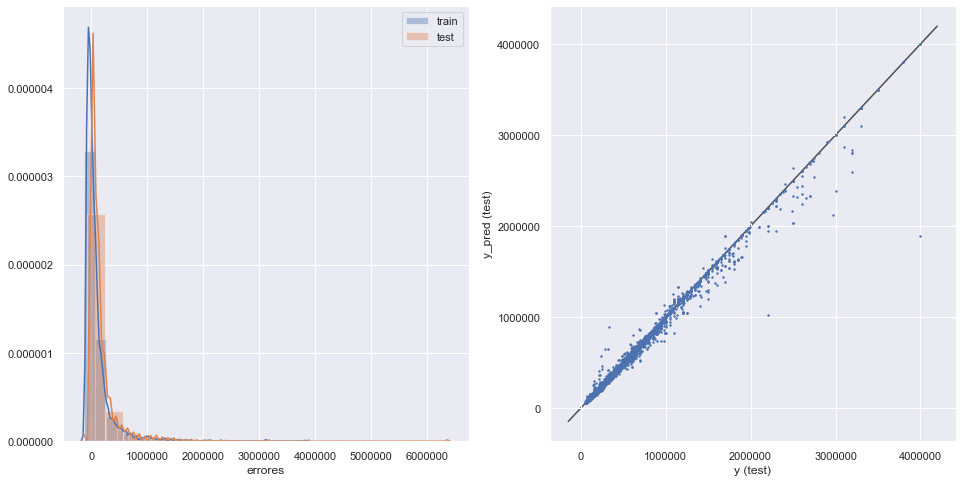

In [ ]:
plt.figure(figsize = (16,8))
plt.title("Vecinos Cercanos: Comparamos los datos de entrenamiento, los de testeo y como se ajustan al modelo") 
plt.subplot(1,2,1)
sns.distplot(np.array(calculo), bins = 20, label = 'train')
sns.distplot(np.array(calculo3), bins = 20, label = 'test')
plt.xlabel('errores')
plt.legend()

ax = plt.subplot(1,2,2)
ax.scatter((y_test3),(y_test_pred3), s =2)

lims = [
np.min([ax.get_xlim(), ax.get_ylim()]),  # min of both axes
np.max([ax.get_xlim(), ax.get_ylim()]),  # max of both axes]
]

ax.plot(lims, lims, 'k-', alpha=0.75, zorder=0)
plt.xlabel('y (test)')
plt.ylabel('y_pred (test)')

# Modelo: Ároboles de Decisión (TP2)
> Creamos un nuevo set de train y test

In [ ]:
X3=df2.drop(['price','start_date','end_date','created_on','l1','l2','l3','currency','title','description','property_type','operation_type',],axis=1)                                                                                 
y3=df2['price']
X_train4, X_test4, y_train4, y_test4 = train_test_split(X3, y3, test_size = 0.30, random_state = 42)

> Entrenamos el modelo

In [ ]:
clasif_DT1 = DecisionTreeClassifier(random_state = 42)
#Entrenamos el modelo
clasif_DT1.fit(X_train4, y_train4)

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                       max_depth=None, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=42, splitter='best')

> Creamos las listas de valores que vamos a explorar

In [ ]:
lista_accuracy_train4 = []
lista_accuracy_test4 = []

# Definimos la lista de valores de k que vamos a explorar
maximaprof = [1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,20,25,30,35,40,50]

# Generamos en loop sobre los distintos valores de k 
for k in maximaprof:
    
    # Vamos a repetir el siguiente bloque de código
    
    # Definir el modelo con el valor de vecinos deseado
    clf = DecisionTreeClassifier(max_depth = k, random_state=42)
    
    # Entrenar el modelo
    clf.fit(X_train4,y_train4)
    
    # Predecir y evaluar sobre el set de entrenamiento
    y_train_pred4 = clf.predict(X_train4)
    train_acc4 = accuracy_score(y_train4, y_train_pred4)
    
    # Predecir y evaluar sobre el set de evaluación
    y_test_pred4 = clf.predict(X_test4)
    test_acc4 = accuracy_score(y_test4, y_test_pred4)
    
    # Agregar la información a las listas
    lista_accuracy_train4.append(train_acc4)
    lista_accuracy_test4.append(test_acc4)

> Imprimimos las listas

In [ ]:
print(lista_accuracy_train4)
print(lista_accuracy_test4)

[0.022997018904956763, 0.027959338604255004, 0.04195752402466347, 0.053233840057770286, 0.07882311552206195, 0.10483826170681579, 0.14042624104282778, 0.19432666135871277, 0.2574851408150795, 0.32997574388505196, 0.40509563575092117, 0.4857148147462366, 0.5712222489677264, 0.6555076193826727, 0.7312940915066566, 0.9531542207491621, 0.995426518784602, 0.9998703871720332, 1.0, 1.0, 1.0]
[0.021558800656700943, 0.027304933897865723, 0.041130216884126845, 0.05041907889052104, 0.07033612719260347, 0.09621532878251102, 0.12952561997753392, 0.18050635098937182, 0.23598029897174458, 0.30355136956709583, 0.37038797200380197, 0.43372504968461073, 0.504536420979867, 0.5629050375874881, 0.6115959561047265, 0.733604078458481, 0.7475589734727383, 0.7484230536593796, 0.7497191739393416, 0.7497191739393416, 0.7497191739393416]


> Ahora calculamos la distancia entre los dos puntos (de test y train) y se ve que sin importar la profundidad, el valor es el mismo

In [ ]:
%%time
listanueva2=[]
for i in np.array(lista_accuracy_train4):
    for j in np.array(lista_accuracy_test4):
        valor=i-j
    listanueva2.append(valor)
    
print(len(listanueva2))
print(listanueva2)

listanueva2=pd.DataFrame(listanueva2, columns=["Resta"])
listanueva2["Árboles_de_decisión(x)"]=[1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,20,25,30,35,40,50]
listanueva2['lista_accuracy_train (y)']=[0.022997018904956763, 0.027959338604255004, 0.04195752402466347, 0.053233840057770286, 0.07882311552206195, 0.10483826170681579, 0.14042624104282778, 0.19432666135871277, 0.2574851408150795, 0.32997574388505196, 0.40509563575092117, 0.4857148147462366, 0.5712222489677264, 0.6555076193826727, 0.7312940915066566, 0.9531542207491621, 0.995426518784602, 0.9998703871720332, 1.0, 1.0, 1.0]
listanueva2['lista_accuracy_test (y)']=[0.021558800656700943, 0.027304933897865723, 0.041130216884126845, 0.05041907889052104, 0.07033612719260347, 0.09621532878251102, 0.12952561997753392, 0.18050635098937182, 0.23598029897174458, 0.30355136956709583, 0.37038797200380197, 0.43372504968461073, 0.504536420979867, 0.5629050375874881, 0.6115959561047265, 0.733604078458481, 0.7475589734727383, 0.7484230536593796, 0.7497191739393416, 0.7497191739393416, 0.7497191739393416]
listanueva2

21
[-0.7267221550343849, -0.7217598353350866, -0.7077616499146782, -0.6964853338815713, -0.6708960584172796, -0.6448809122325259, -0.6092929328965139, -0.5553925125806288, -0.4922340331242621, -0.41974343005428966, -0.34462353818842045, -0.264004359193105, -0.17849692497161518, -0.09421155455666896, -0.018425082432685036, 0.2034350468098205, 0.24570734484526036, 0.2501512132326916, 0.2502808260606584, 0.2502808260606584, 0.2502808260606584]
Wall time: 8 ms


,Resta,Árboles_de_decisión(x),lista_accuracy_train (y),lista_accuracy_test (y)
0,-0.726722,1,0.022997,0.021559
1,-0.721760,2,0.027959,0.027305
2,-0.707762,3,0.041958,0.041130
3,-0.696485,4,0.053234,0.050419
4,-0.670896,5,0.078823,0.070336
5,-0.644881,6,0.104838,0.096215
6,-0.609293,7,0.140426,0.129526
7,-0.555393,8,0.194327,0.180506
8,-0.492234,9,0.257485,0.235980
9,-0.419743,10,0.329976,0.303551


Text(0, 0.5, 'Exactitud')

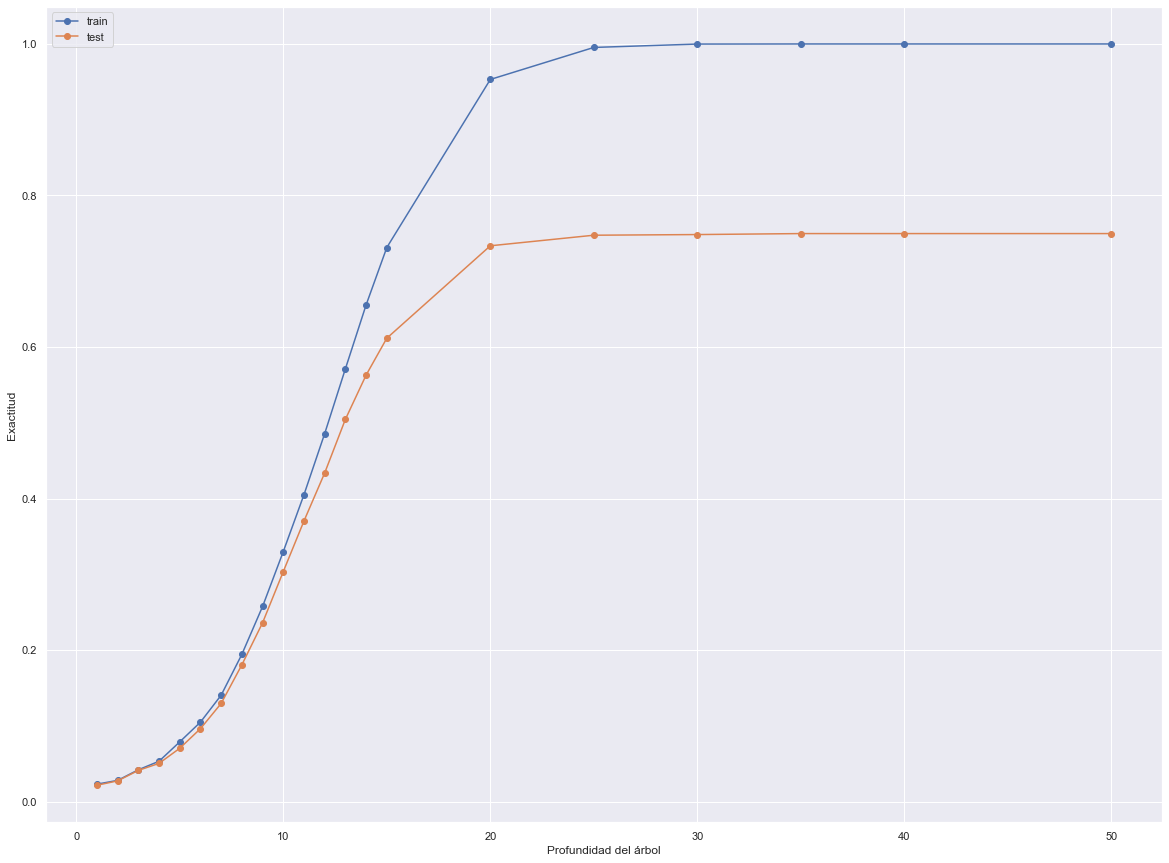

In [ ]:
plt.figure(figsize=(20,15))
plt.plot(maximaprof,lista_accuracy_train4,'o-',label='train')
plt.plot(maximaprof,lista_accuracy_test4,'o-',label='test')
#plt.plot(k_vecinos,listanueva,'--',label='resta')

plt.legend()
plt.xlabel('Profundidad del árbol')
plt.ylabel('Exactitud')

## Usamos profundidad 15
> Y vemos el porcentaje de acierto

In [ ]:
tree = DecisionTreeClassifier(max_depth=15)
    
# Entrenar el modelo
tree.fit(X_train4,y_train4)
# Predecir y evaluar sobre el set de entrenamiento
y_train_pred4 = tree.predict(X_train4)
train_acc4 = accuracy_score(y_train4, y_train_pred4)
y_test_pred4 = clf_knn.predict(X_test4)

train_acc4 = accuracy_score(y_train4, y_train_pred4)
test_acc4 = accuracy_score(y_test4, y_test_pred4)
# Esto de aca nos devuelve el porcentaje de aciertos para el ultimo k,
# osea que no es EL porcentaje de aciertos del algoritmo
print('Porcentaje de aciertos sobre el set de entrenamiento:', train_acc4)
print('Porcentaje de aciertos sobre el set de evaluación:',test_acc4)

Porcentaje de aciertos sobre el set de entrenamiento: 0.7314607365711853
Porcentaje de aciertos sobre el set de evaluación: 0.43558282208588955


In [ ]:
%%time
print(len(y_test4),len(y_test_pred4))
calculo2=[]
for i in np.array(y_test4):
    for j in np.array(y_test_pred4):
        cal=i-j
    calculo2.append(cal)
#calculo2

23146 23146
Wall time: 4min 33s


In [ ]:
calculotrain=[]
for i in np.array(y_train4):
    for j in np.array(y_train_pred4):
        cal=i-j
    calculotrain.append(cal)
calculotrain

[550107.0,
 235100.0,
 514600.0,
 250100.0,
 165100.0,
 100.0,
 589100.0,
 190100.0,
 530100.0,
 -14900.0,
 330100.0,
 105100.0,
 128100.0,
 -5900.0,
 30100.0,
 -7327.0,
 -2900.0,
 139500.0,
 59100.0,
 100100.0,
 63100.0,
 19100.0,
 30100.0,
 440100.0,
 30100.0,
 30100.0,
 120100.0,
 3100.0,
 15100.0,
 78100.0,
 340100.0,
 -47000.0,
 5100.0,
 110100.0,
 210100.0,
 240100.0,
 20100.0,
 190100.0,
 5100.0,
 19100.0,
 3100.0,
 1290100.0,
 165100.0,
 97100.0,
 240100.0,
 65100.0,
 470100.0,
 75100.0,
 215900.0,
 90100.0,
 60100.0,
 125100.0,
 470100.0,
 40100.0,
 159100.0,
 -20000.0,
 82100.0,
 159100.0,
 59100.0,
 -24900.0,
 -4900.0,
 170100.0,
 100.0,
 -6324.0,
 800100.0,
 86600.0,
 90000.0,
 58100.0,
 53100.0,
 160100.0,
 27732.0,
 360100.0,
 490100.0,
 1789100.0,
 155100.0,
 35100.0,
 -25900.0,
 239100.0,
 -12900.0,
 640100.0,
 165100.0,
 540100.0,
 29600.0,
 183100.0,
 289200.0,
 59100.0,
 270000.0,
 209067.0,
 78100.0,
 145100.0,
 320100.0,
 -14900.0,
 109100.0,
 770100.0,
 42100.0,
 

### Según lo calculado, debemos usar 15 de profundidad.

El r2 sobre el set de entrenamiento: 0.9825061312540976
El r2 sobre el set de evaluacion: 0.9810211976714405
El error absoluto medio sobre el set de entrenamiento: 5076.42450052771
El error absoluto medio sobre el set de evaluacion: 6958.318413548777
Porcentaje de aciertos sobre el set de entrenamiento: 0.7314607365711853
Porcentaje de aciertos sobre el set de evaluación: 0.43558282208588955
El RMSE sobre el set de entrenamiento es: 41068.574434226284
El RMSE sobre el set de evaluación es: 40548.91724686722

Wall time: 20.2 s


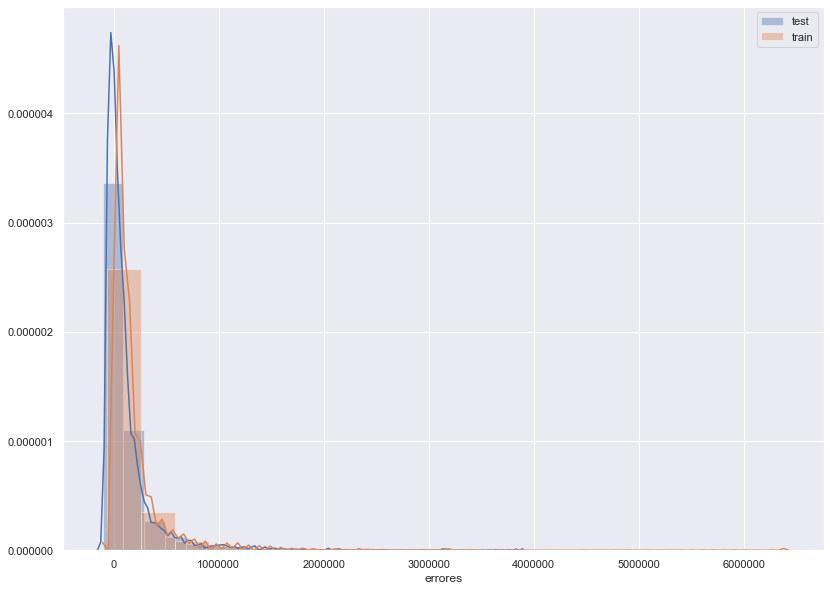

In [ ]:
%%time
#X_train4, X_test4, y_train4, y_test4 = train_test_split(X3, y3, test_size = 0.30, random_state = 42)
arboles4 = DecisionTreeClassifier(max_depth = 15, random_state=42)
arboles4.fit(X_train4, y_train4)
y_train_pred4 = arboles4.predict(X_train4)
y_test_pred4 = arboles4.predict(X_test4)
train_maxe4 = r2_score(y_train4, y_train_pred4)
test_maxe4 = r2_score(y_test4, y_test_pred4)
print('El r2 sobre el set de entrenamiento:', train_maxe4)
print('El r2 sobre el set de evaluacion:',test_maxe4)
train_mae4 = mean_absolute_error(y_train4, y_train_pred4)
test_mae4 = mean_absolute_error(y_test4, y_test_pred4)
print('El error absoluto medio sobre el set de entrenamiento:', train_mae4)
print('El error absoluto medio sobre el set de evaluacion:',test_mae4)
print('Porcentaje de aciertos sobre el set de entrenamiento:', train_acc4)
print('Porcentaje de aciertos sobre el set de evaluación:',test_acc4)
print ('El RMSE sobre el set de entrenamiento es:', np.sqrt(mean_squared_error(y_train4, y_train_pred4)))  
print ('El RMSE sobre el set de evaluación es:', np.sqrt(mean_squared_error(y_test4, y_test_pred4)))
#rmse_tra = np.sqrt(mean_squared_error(y_train3, y_train_pred3))
#rmse_tes = np.sqrt(mean_squared_error(y_test3, y_test_pred3))
#print(f'RMSE (en Train): {rmse_tra}')
#print(f'RMSE (en Test): {rmse_tes}')
#print()
print()
plt.figure(figsize = (30,10))
plt.subplot(1,2,1)
sns.distplot(np.array(calculo2).reshape(-1,1), bins = 20, label = 'test')
#sns.distplot(np.array((y_test4)-(y_test_pred4)).reshape(-1,1), bins = 20, label = 'test')
#sns.distplot(np.array((y_train)-(y_train_pred4)).reshape(-1,1), bins = 20, label = 'train')
sns.distplot(np.array(calculotrain).reshape(-1,1), bins = 20, label = 'train')
plt.xlabel('errores')
plt.legend()

Text(0, 0.5, 'y_pred (test)')

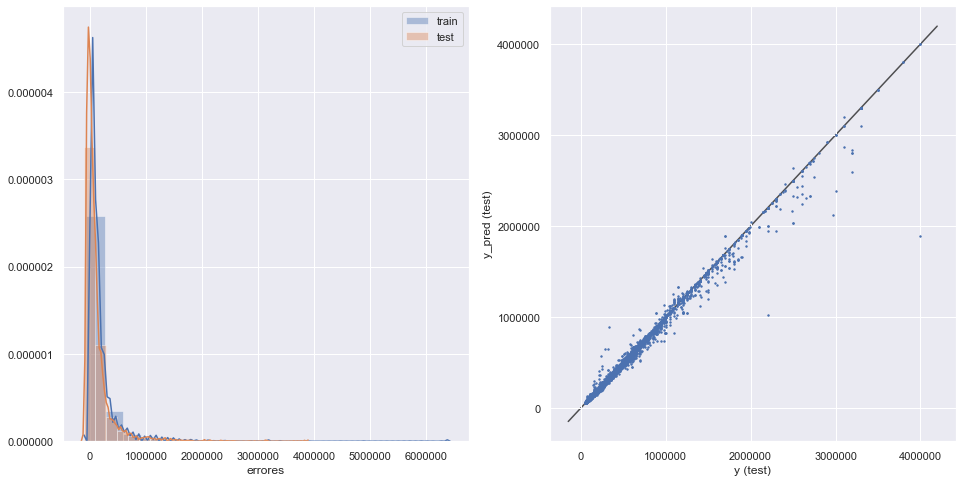

In [ ]:
plt.figure(figsize = (16,8))
plt.title("Vecinos Cercanos: Comparamos los datos de entrenamiento, los de testeo y como se ajustan al modelo") 
plt.subplot(1,2,1)
sns.distplot(np.array(calculotrain), bins = 20, label = 'train')
sns.distplot(np.array(calculo2), bins = 20, label = 'test')
plt.xlabel('errores')
plt.legend()

ax = plt.subplot(1,2,2)
ax.scatter((y_test3),(y_test_pred3), s =2)

lims = [
np.min([ax.get_xlim(), ax.get_ylim()]),  # min of both axes
np.max([ax.get_xlim(), ax.get_ylim()]),  # max of both axes]
]

ax.plot(lims, lims, 'k-', alpha=0.75, zorder=0)
plt.xlabel('y (test)')
plt.ylabel('y_pred (test)')

### Mejoras en el desempeño:
> * Mejoras en el desempeño para Decision Tree Classifier?
Vemos que tanto en el tp1 como en el tp2, ambos modelos han sido sobre entrenados.
Para decision tree classifier;
No ha tenido una mejora en el error absoluto medio, pero al mismo tiempo, 
vemos como en el EAM del set de entrenamiento es cero, lo que nos confirma que
está sobreentrenado, esto no es recomendable.
Por lo que para este caso, sería conveniente hacer un cross validation,
para tomar varias partes distintas del dataset. 
Me sorprende para mal que la exactitud haya bajado en el tp2.
El RMSE se mantuvo igual.
Habrá que mejorar la parte de preprocesamiento de datos.


> * Mejoras en el desempeño para KNN Classifier?
Vemos también que en el tp1 y en el tp2 ha sido sobreentrenados.
En el tp1, los errores de entrenamiento se ven bastante más significativos. 
Dado que el r2_score marca un gran overfitting, el error absoluto medio del
set de entrenamiento da cero y obviamente el error absoluto medio sobre el set
de testeo es mucho mayor.
La exactitud en el tp1 en el set de train marca overfitting y a en el tp2,
si bien la exactitud no es muy buena, al menos no está sobreentrenada.
#### Los resultados para el TP1, fueron:
> * `DecisionTreeClassifier:(TP1)`
> * El r2 sobre el set de entrenamiento: 0.9825061312540976
> * El r2 sobre el set de evaluacion: 0.9810211976714405
> * La exactitutd de DecisionTreeClassifier sobre el set de test es :  0.6115959561047265
> * La exactitutd de DecisionTreeClassifier sobre el set de train es :  0.7312940915066566
> * El error absoluto medio sobre el set de entrenamiento: 5076.42450052771
> * El error absoluto medio sobre el set de evaluacion: 6958.318413548777
> * El RMSE sobre el set de entrenamiento es: 41068.574434226284
> * El RMSE sobre el set de evaluación es: 40548.91724686722
> * `KNN Classifier: (TP1)`
> * El r2 sobre el set de entrenamiento: 1.0
> * El r2 sobre el set de evaluacion: 0.9894957128149074
> * La exactitud de K-NN classifier sobre el set de test es:  0.6986952389181716
> * La exactitud de K-NN classifier sobre el set de train es:  1.0
> * El error absoluto medio sobre el set de entrenamiento: 0.0
> * El error absoluto medio sobre el set de evaluacion: 5740.811025663182
> * El RMSE sobre el set de entrenamiento es: 0.0
> * El RMSE sobre el set de evaluación es: 30166.724295876982
#### Los resultados para el TP2, fueron:
> * `DecisionTreeClassifier:(TP2)`
> * El r2 sobre el set de entrenamiento: 0.9825061312540976
> * El r2 sobre el set de evaluacion: 0.9810211976714405
> * El error absoluto medio sobre el set de entrenamiento: 5076.42450052771
> * El error absoluto medio sobre el set de evaluacion: 6958.318413548777
> * Porcentaje de aciertos sobre el set de entrenamiento: 0.7314607365711853
> * Porcentaje de aciertos sobre el set de evaluación: 0.43558282208588955
> * El RMSE sobre el set de entrenamiento es: 41068.574434226284
> * El RMSE sobre el set de evaluación es: 40548.91724686722
> * `KNN Classifier:(TP2)`
> * El r2 sobre el set de entrenamiento: 1.0
> * El r2 sobre el set de evaluacion: 0.9893441470276033
> * El error absoluto medio sobre el set de entrenamiento: 0.0
> * El error absoluto medio sobre el set de evaluacion: 5838.92305365938
> * El porcentaje de aciertos sobre el set de entrenamiento es:  0.5238765345233025
> * El porcentaje de aciertos sobre el set de evaluación es:  0.43558282208588955
> * RMSE (en Train): 0.0
> * RMSE (en Test): 30383.581851403367
#### Comentario/Observación
> * `Esto se debe a varios motivos;`
> *   En el `TP1` hicimos un análisis exploratorio de datos, de sus correlaciones con las otras variables y de sus outliers, pero lo que no hicimos, fué trabajar los valores faltantes.
En el `TP1` a los valores faltantes, directamente los borrabamos, sin saber ó sin tener en cuenta porqué faltaban.
> *    Luego de hacer el análisis exploratorio de datos en el `TP2` y particularmente de los valores faltantes con la librería Missingno, pudimos tener una noción mucho mayor de la distribución de los valores faltantes con los demás. También pudimos ver la correlación que tenían estas features faltantes con las demás faltantes y en base a eso, se decidía el criterio para imputar.
> *    En conclusión, los modelos entrenados del `TP2`, funcionan mejor por como fue tratado el dataset.

### PARTE B - Modelos Avanzados
> * .Elige dos de los modelos avanzados vistos Compara con el desempeño obtenido en el proyecto 01 (en el caso de regresión, considera una regresión lineal con atributos polinómicos y regularización). Entrénalos y evalúalos con sus argumentos por defecto. No te olvides de hacer un train/test split y usar Validación Cruzada.

> * .Optimiza sus hiperparámetros mediante Validación Cruzada y Grid Search o Random Search.

> * .Compara el desempeño de los nuevos modelos entre sí y con el modelo de la Parte A. ¿Cuál elegirías? Justifica.

## Random Forest Regressor
#### Generamos de nuevo el train, test split 

In [ ]:
X5=df2.drop(['price','start_date','end_date','created_on','l1','l2','l3','currency','title','description','property_type','operation_type',],axis=1)                                                                                 
y5=df2['price']
X_train6, X_test6, y_train6, y_test6 = train_test_split(X5, y5, test_size = 0.30, random_state = 42)

In [ ]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import cross_validate
from sklearn.model_selection import cross_val_score

In [ ]:
clf = RandomForestRegressor(warm_start=True)
clf.fit(X_train6, y_train6.values.ravel())

RandomForestRegressor(bootstrap=True, ccp_alpha=0.0, criterion='mse',
                      max_depth=None, max_features='auto', max_leaf_nodes=None,
                      max_samples=None, min_impurity_decrease=0.0,
                      min_impurity_split=None, min_samples_leaf=1,
                      min_samples_split=2, min_weight_fraction_leaf=0.0,
                      n_estimators=100, n_jobs=None, oob_score=False,
                      random_state=None, verbose=0, warm_start=True)

In [ ]:
scores_3 = cross_validate(clf, X_train6, y_train6.values.ravel(), scoring=('r2', 'neg_mean_absolute_error'), cv=5, return_train_score=True )

In [ ]:
%%time
clf_train_scores_mean = []
clf_train_scores_std = []
clf_test_scores_mean = []
clf_test_scores_std = []

max_depths = np.arange(1,11,1)

for max_depth in max_depths:
 
    clf = RandomForestRegressor( max_depth=max_depth, random_state=42)
    clf_scores = cross_validate(clf, X5, y5, cv=5, return_train_score=True, n_jobs = -1)
    
    clf_train_scores_mean.append(clf_scores['train_score'].mean())
    clf_train_scores_std.append(clf_scores['train_score'].std())
    
    clf_test_scores_mean.append(clf_scores['test_score'].mean())
    clf_test_scores_std.append(clf_scores['test_score'].std())

clf_train_scores_mean = np.array(clf_train_scores_mean)
clf_train_scores_std = np.array(clf_train_scores_std)
clf_test_scores_mean = np.array(clf_test_scores_mean)
clf_test_scores_std = np.array(clf_test_scores_std)

Wall time: 11min 17s


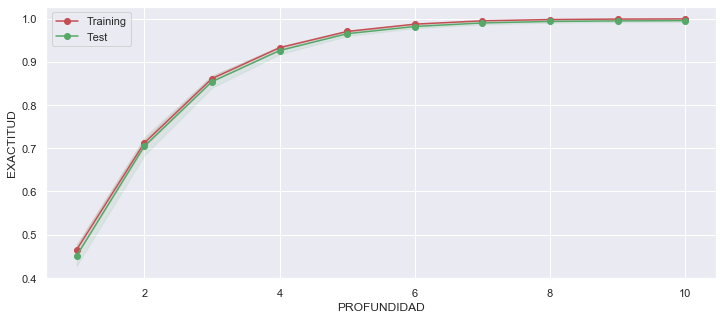

In [ ]:
## Sigo con este gráfico para ver que onda
plt.figure(figsize=(12,5))
plt.fill_between(max_depths, clf_train_scores_mean - clf_train_scores_std,
clf_train_scores_mean + clf_train_scores_std, alpha=0.1,color="r")
plt.fill_between(max_depths, clf_test_scores_mean - clf_test_scores_std,clf_test_scores_mean + clf_test_scores_std, alpha=0.1, color="g")
plt.plot(max_depths, clf_train_scores_mean, 'o-', color="r",label="Training")
plt.plot(max_depths, clf_test_scores_mean, 'o-', color="g",label="Test")
plt.legend()
plt.ylabel('EXACTITUD')
plt.xlabel('PROFUNDIDAD')
plt.show()

In [ ]:
%%time
clf = RandomForestRegressor(max_depth=3, random_state=42)
clf_scores = cross_val_score(clf, X5, y5, cv=5)
print("Exactitud de Random Forest: %0.2f (+/- %0.2f)" % (clf_scores.mean(), clf_scores.std() * 2))

Exactitud de Random Forest: 0.85 (+/- 0.03)
Wall time: 1min 14s


In [ ]:
clf_RFR = RandomForestRegressor( max_depth=3, random_state=42)

In [ ]:
clf_RFR.fit(X_train6, y_train6)
y_train_pred7 = clf_RFR.predict(X_train6)
y_test_pred7 = clf_RFR.predict(X_test6)

### Realizamos optimización de hiperparámetros con validación cruzada para Random Forest Regressor

In [ ]:
scores_3 = cross_validate(clf, X_train6, y_train6.values.ravel(), scoring=('r2', 'neg_mean_absolute_error'), cv=5, return_train_score=True )    

In [ ]:
train_maxe_ = np.mean(scores_3['train_r2'])
test_maxe_ = np.mean(scores_3['test_r2'])
print('El r2 sobre el set de entrenamiento:', train_maxe_)
print('El r2 sobre el set de evaluacion:',test_maxe_)
print()
    
train_mae_ = abs(np.mean(scores_3['train_neg_mean_absolute_error']))
test_mae_ = abs(np.mean(scores_3['test_neg_mean_absolute_error']))
rmsetrain= (np.rmse(scores_3['test neg_squared_mean_error']))
print('El error absoluto medio sobre el set de entrenamiento:', train_mae_)
print('El error absoluto medio sobre el set de evaluacion:',test_mae_)
#print ('El RMSE sobre el set de entrenamiento es:', mean_squared_error(y_train6, y_train_pred7))
#print ('El RMSE sobre el set de evaluación es:', mean_squared_error(y_test6, y_test_pred7))
print()

El r2 sobre el set de entrenamiento: 0.8608285297119409
El r2 sobre el set de evaluacion: 0.8574981512455017

El error absoluto medio sobre el set de entrenamiento: 64458.69627500574
El error absoluto medio sobre el set de evaluacion: 64826.78294240398



## Luego, acá vemos la distribución de errores y vemos como difieren los mismos, si no le aplicamos la validación cruzada al cálculo.

El r2 sobre el set de entrenamiento: 0.8567954198401873
El r2 sobre el set de evaluacion: 0.8645566362690893
El error absoluto medio sobre el set de entrenamiento: 65199.77198693168
El error absoluto medio sobre el set de evaluacion: 64302.87961219178

MODELO : RANDOM FOREST
RMSE (en Train): 117501.97063853174
RMSE (en Test): 108323.75998183058


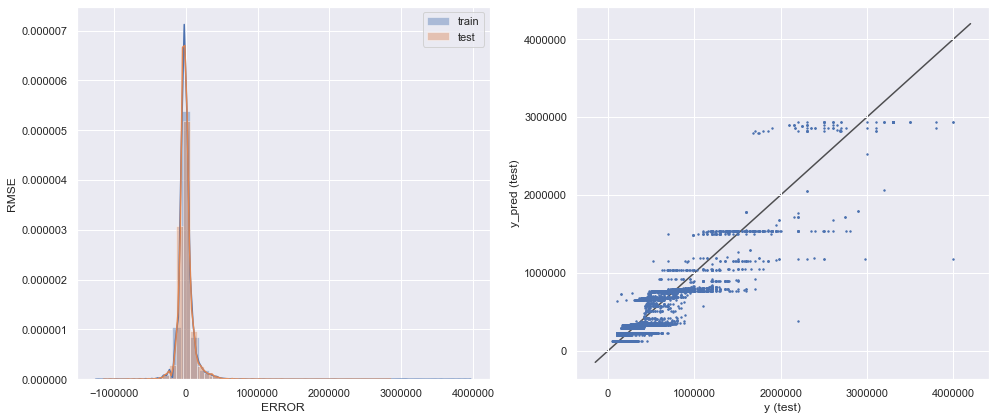

Wall time: 3.26 s


In [ ]:
%%time
from sklearn.metrics import mean_squared_error
import seaborn as sns
modelos = ['RANDOM FOREST']

for i, model in enumerate([clf_RFR]):
    y_train_pred8 = model.predict(X_train6)
    y_test_pred8 = model.predict(X_test6)
    train_maxe8 = r2_score(y_train6, y_train_pred8)
    test_maxe8 = r2_score(y_test6, y_test_pred8)
    print('El r2 sobre el set de entrenamiento:', train_maxe8)
    print('El r2 sobre el set de evaluacion:',test_maxe8)
    train_mae4 = mean_absolute_error(y_train6, y_train_pred8)
    test_mae4 = mean_absolute_error(y_test6, y_test_pred8)
    print('El error absoluto medio sobre el set de entrenamiento:', train_mae4)
    print('El error absoluto medio sobre el set de evaluacion:',test_mae4)
    print()

    
    print(f'MODELO : {modelos[i]}')
    rmse_train = np.sqrt(mean_squared_error(y_train6, y_train_pred8))
    rmse_test = np.sqrt(mean_squared_error(y_test6, y_test_pred8))
    print(f'RMSE (en Train): {rmse_train}')
    print(f'RMSE (en Test): {rmse_test}')
    #train_acc8 = accuracy_score(y_train6, y_train_pred8)
    #test_acc8 = accuracy_score(y_test6, y_test_pred8)
    #print(f'La exsctitud del modelo sobre el set de testeo es:  {train_acc8}')
    #print(f'La exactitud del modelo sobre el set de entrenamiento es:{test_acc8}')
    plt.figure(figsize = (14,6))
    plt.subplot(1,2,1)
    sns.distplot(y_train6 - y_train_pred8, bins = 40, label = 'train')
    sns.distplot(y_test6 - y_test_pred8, bins = 40, label = 'test')
    plt.xlabel('ERROR')
    plt.ylabel('RMSE')
    plt.legend()
    ax = plt.subplot(1,2,2)
    ax.scatter(y_test6,y_test_pred8, s =2)
    lims = [
    np.min([ax.get_xlim(), ax.get_ylim()]),  
    np.max([ax.get_xlim(), ax.get_ylim()]),  
    ]
    ax.plot(lims, lims, 'k-', alpha=0.75, zorder=0)
    plt.xlabel('y (test)')
    plt.ylabel('y_pred (test)')
    plt.tight_layout()
    plt.show()

El r2 sobre el set de entrenamiento: 0.8567954198401873
El r2 sobre el set de evaluacion: 0.8645566362690893
El error absoluto medio sobre el set de entrenamiento: 65199.77198693168
El error absoluto medio sobre el set de evaluacion: 64302.87961219178



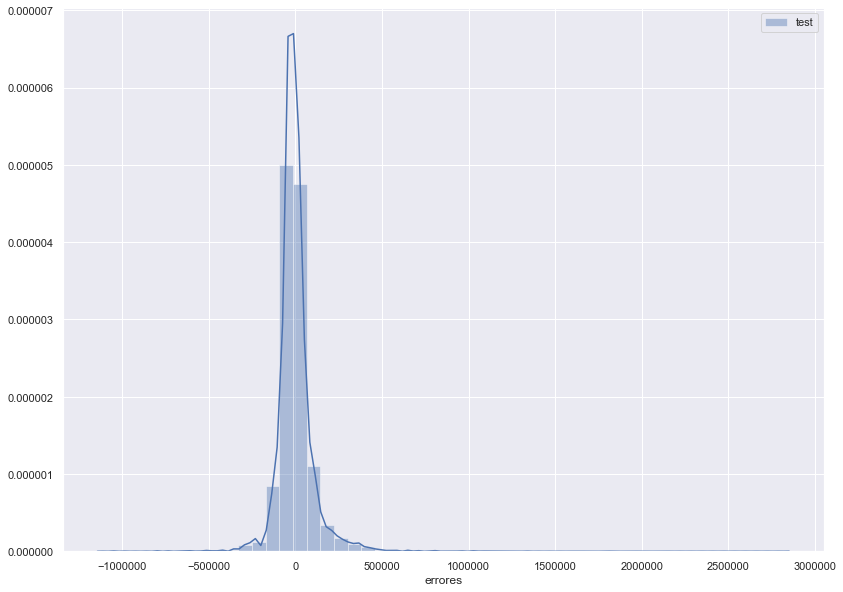

In [ ]:
clf.fit(X_train6, y_train6.values.ravel())

train_maxe8 = r2_score(y_train6, y_train_pred8)
test_maxe8 = r2_score(y_test6, y_test_pred8)
print('El r2 sobre el set de entrenamiento:', train_maxe8)
print('El r2 sobre el set de evaluacion:',test_maxe8)
train_mae8 = mean_absolute_error(y_train6, y_train_pred8)
test_mae8 = mean_absolute_error(y_test6, y_test_pred8)
print('El error absoluto medio sobre el set de entrenamiento:', train_mae8)
print('El error absoluto medio sobre el set de evaluacion:',test_mae8)
print()
 
y_train_pred_9 = clf.predict(X_train6)
y_test_pred_9 = clf.predict(X_test6)

plt.figure(figsize = (30,10))

plt.subplot(1,2,1)

sns.distplot(np.array((y_test6) -(y_test_pred_9)).reshape(-1,1), bins = 50, label = 'test')
plt.xlabel('errores')
plt.legend()

# XGBOOST

In [ ]:
import xgboost 
import xgboost as xgb
from xgboost import XGBRegressor

### Generaromos el modelo
#### y volvemos a usar  los mismos:                                                                                
X_train6, X_test6, y_train6, y_test6 = train_test_split(X5, y5, test_size = 0.30, random_state = 42)

In [ ]:
##X5=df2.drop(['start_date','end_date','created_on','l1','l2','l3','currency','title','description','property_type','operation_type',],axis=1)                                                                                 
##y5=df2['price']
##X_train6, X_test6, y_train6, y_test6 = train_test_split(X5, y5, test_size = 0.30, random_state = 42)

In [ ]:
xgb_ = xgb.XGBRegressor()
xgb_.fit(X_train6, y_train6.values.ravel())

XGBRegressor(base_score=0.5, booster='gbtree', colsample_bylevel=1,
             colsample_bynode=1, colsample_bytree=1, gamma=0, gpu_id=-1,
             importance_type='gain', interaction_constraints='',
             learning_rate=0.300000012, max_delta_step=0, max_depth=6,
             min_child_weight=1, missing=nan, monotone_constraints='()',
             n_estimators=100, n_jobs=0, num_parallel_tree=1,
             objective='reg:squarederror', random_state=0, reg_alpha=0,
             reg_lambda=1, scale_pos_weight=1, subsample=1, tree_method='exact',
             validate_parameters=1, verbosity=None)

In [ ]:
y_train_pred_XGB = xgb_.predict(X_train6)
y_test_pred_XGB = xgb_.predict(X_test6)

In [ ]:
y_train_pred_XGB

array([662166.  , 336123.7 , 618651.3 , ..., 368991.6 , 160507.73,
       108129.69], dtype=float32)

### Realizamos optimización de hiperparámetros con validación cruzada a XGBOOST

In [ ]:
scores_4 = cross_validate(xgb_, X_train6, y_train_pred_XGB, scoring=('r2', 'neg_mean_absolute_error'), cv=5, return_train_score=True )    

In [ ]:
train_maxe_2 = np.mean(scores_4['train_r2'])
test_maxe_2 = np.mean(scores_4['test_r2'])
print('El r2 sobre el set de entrenamiento:', train_maxe_2)
print('El r2 sobre el set de evaluacion:',test_maxe_2)
print()
    
train_mae_2 = abs(np.mean(scores_4['train_neg_mean_absolute_error']))
test_mae_2 = abs(np.mean(scores_4['test_neg_mean_absolute_error']))
print('El error absoluto medio sobre el set de entrenamiento:', train_mae_2)
print('El error absoluto medio sobre el set de evaluacion:',test_mae_2)


print()

El r2 sobre el set de entrenamiento: 0.9998786560306453
El r2 sobre el set de evaluacion: 0.9963488955236803

El error absoluto medio sobre el set de entrenamiento: 2039.185400390625
El error absoluto medio sobre el set de evaluacion: 2969.743017578125



El r2 sobre el set de entrenamiento: 0.9997761848797727
El r2 sobre el set de evaluacion: 0.9972420742406911

El error absoluto medio sobre el set de entrenamiento: 2948.0401062738397
El error absoluto medio sobre el set de evaluacion: 3843.903339298637
RMSE (en Train): 4645.27476619014
RMSE (en Test): 15457.389351136133



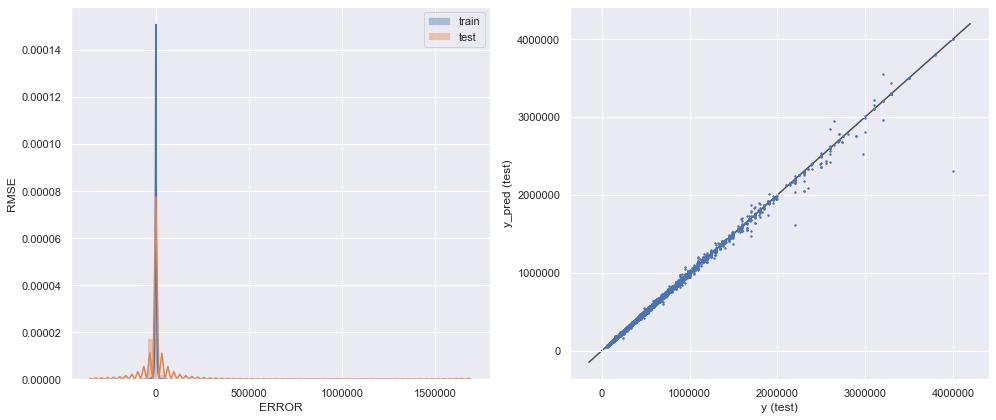

Wall time: 2.79 s


In [ ]:
%%time
from sklearn.metrics import mean_squared_error
import seaborn as sns
modelos = ['XGBOOST-linear']

for i, model in enumerate([xgb_]):
    y_train_pred7 = xgb_.predict(X_train6)
    y_test_pred7 = xgb_.predict(X_test6)

    train_maxe9 = r2_score(y_train6, y_train_pred7)
    test_maxe9 = r2_score(y_test6, y_test_pred7)
    #train_maxe = np.mean(scores_4['train_r2'])
    #test_maxe = np.mean(scores_4['test_r2'])
    print('El r2 sobre el set de entrenamiento:', train_maxe9)
    print('El r2 sobre el set de evaluacion:',test_maxe9)
    print()
 
    train_mae9 = mean_absolute_error(y_train6, y_train_pred7)
    test_mae9 = mean_absolute_error(y_test6, y_test_pred7)
    print('El error absoluto medio sobre el set de entrenamiento:', train_mae9)
    print('El error absoluto medio sobre el set de evaluacion:',test_mae9)
    rmse_train2 = np.sqrt(mean_squared_error(y_train6, y_train_pred7))
    rmse_test2 = np.sqrt(mean_squared_error(y_test6, y_test_pred7))
    print(f'RMSE (en Train): {rmse_train2}')
    print(f'RMSE (en Test): {rmse_test2}')
    print()
    
    plt.figure(figsize = (14,6))

    plt.subplot(1,2,1)
    sns.distplot(y_train6 - y_train_pred7, bins = 40, label = 'train')
    sns.distplot(y_test6 - y_test_pred7, bins = 40, label = 'test')
    plt.xlabel('ERROR')
    plt.ylabel('RMSE')
    plt.legend()


    ax = plt.subplot(1,2,2)
    ax.scatter(y_test6,y_test_pred7, s =2)
    
    lims = [
    np.min([ax.get_xlim(), ax.get_ylim()]),  
    np.max([ax.get_xlim(), ax.get_ylim()]),  
    ]
    
    ax.plot(lims, lims, 'k-', alpha=0.75, zorder=0)
    plt.xlabel('y (test)')
    plt.ylabel('y_pred (test)')
    
    plt.tight_layout()
    plt.show()

El r2 sobre el set de entrenamiento: 0.9997761848797727
El r2 sobre el set de evaluacion: 0.9972420742406911

El error absoluto medio sobre el set de entrenamiento: 2948.0401062738397
El error absoluto medio sobre el set de evaluacion: 3843.903339298637

RMSE (en Train): 4645.27476619014
RMSE (en Test): 15457.389351136133


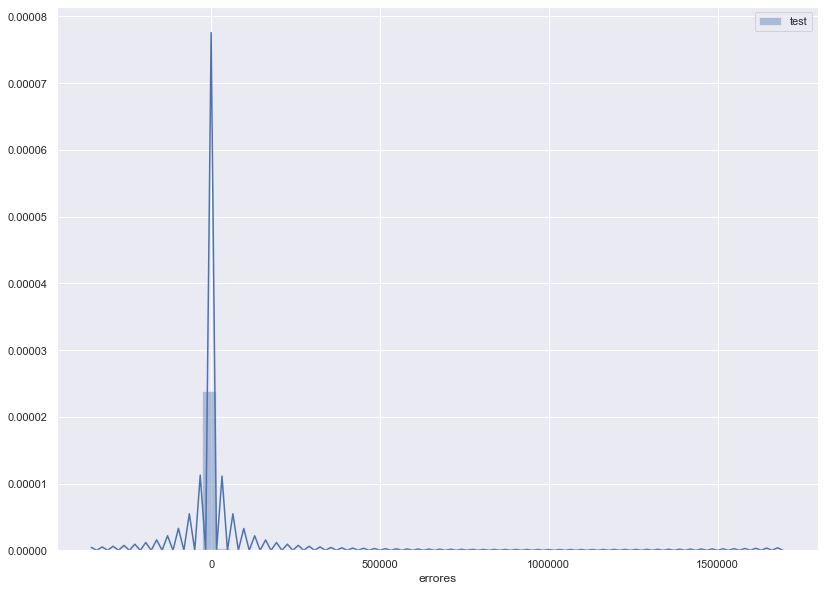

In [ ]:
y_train_pred7 = xgb_.predict(X_train6)
y_test_pred7 = xgb_.predict(X_test6)

train_maxe9 = r2_score(y_train6, y_train_pred7)
test_maxe9 = r2_score(y_test6, y_test_pred7)
#train_maxe = np.mean(scores_4['train_r2'])
#test_maxe = np.mean(scores_4['test_r2'])
print('El r2 sobre el set de entrenamiento:', train_maxe9)
print('El r2 sobre el set de evaluacion:',test_maxe9)
print()
 
    
train_mae9 = mean_absolute_error(y_train6, y_train_pred7)
test_mae9 = mean_absolute_error(y_test6, y_test_pred7)
print('El error absoluto medio sobre el set de entrenamiento:', train_mae9)
print('El error absoluto medio sobre el set de evaluacion:',test_mae9)
print()    
    
rmse_train = np.sqrt(mean_squared_error(y_train6, y_train_pred7))
rmse_test = np.sqrt(mean_squared_error(y_test6, y_test_pred7))
print(f'RMSE (en Train): {rmse_train}')
print(f'RMSE (en Test): {rmse_test}')


plt.figure(figsize = (30,10))

plt.subplot(1,2,1)

sns.distplot(np.array((y_test6) -(y_test_pred7)).reshape(-1,1), bins = 50, label = 'test')
plt.xlabel('errores')
plt.legend()

In [ ]:
%%time
clf = XGBRegressor()
clf_scores = cross_val_score(clf, X5, y5, cv=5)
print("Exactitud de XGBRegressor: %0.2f (+/- %0.2f)" % (clf_scores.mean(), clf_scores.std() * 2))

Exactitud de XGBRegressor: 1.00 (+/- 0.00)
Wall time: 25.3 s


### Conclusión sobre optimización de hiperparámtros con validación cruzada;

> Hemos visto que los resultados en el modelo de RandomForestRegressor, usando el cross validation ha dado un resultado sobre el R2_score, mucho más verídico.
Si bien el error medio absoluto aumenta de manera significativa, el error medio cuadrático disminuye.
Mientras que en el modelo de XGBOOST, no ha habido grandes cambios en el R2_score, el modelo sigue sobrentrenandose. El error medio absoluto, tiene poca diferencia entre el train y test. Y al mismo tiempo es bajo, lo que indica un buen rendimiento.

## Con respecto al RandomForestRegressor con cross validation:

> * El r2 sobre el set de entrenamiento: 0.8567954198401873
> * El r2 sobre el set de evaluacion: 0.8645566362690893
> * El error absoluto medio sobre el set de entrenamiento: 64458.69627500574
> * El error absoluto medio sobre el set de evaluacion: 64826.78294240398
> * RMSE (en Train): 117501.97063853174
> * RMSE (en Test): 108323.75998183058

> Bajo mi perspectiva, el RFR es el modelo que menos overfitea, pero tiene un alto error en las metricas seleccionadas, por lo que no lo elegiría.

## Con respecto a XGBOOST con cross validation:

> * El r2 sobre el set de entrenamiento: 0.9998786560306453
> * El r2 sobre el set de evaluacion: 0.9963488955236803
> * El error absoluto medio sobre el set de entrenamiento: 2039.185400390625
> * El error absoluto medio sobre el set de evaluacion: 2969.743017578125
> * RMSE (en Train): 4645.27476619014
> * RMSE (en Test): 15457.389351136133

> * El XGBOOST es un modelo que no tiene gran costo computacional y al mismo tiempo funciona bastante mejor que los vistos anteriormente (con crossvalidation) 

## Con respecto al KNN Classifier del TP2:

> * El r2 sobre el set de entrenamiento: 1.0
> * El r2 sobre el set de evaluacion: 0.9925387408554062
> * El error absoluto medio sobre el set de entrenamiento: 0.0
> * El error absoluto medio sobre el set de evaluacion: 4695.2498585378835
> * El porcentaje de aciertos sobre el set de entrenamiento es:  0.5238765345233025
> * El porcentaje de aciertos sobre el set de evaluación es:  0.43558282208588955
> * RMSE (en Train): 0.0
> * RMSE (en Test): 25424.41230617244

> * Las metricas de R2_score para este modelo dan muy positivas, lo que no me genera mucha confianza, por eso elegí ver el porcentaje de aciertos y evidentemente es bastante bajo. No sólo eso si no que con el RMSE calculado

## Con respecto al Árbol de decision del TP2:

> * El r2 sobre el set de entrenamiento: 0.9825061312540976
> * El r2 sobre el set de evaluacion: 0.9810211976714405
> * El error absoluto medio sobre el set de entrenamiento: 5076.42450052771
> * El error absoluto medio sobre el set de evaluacion: 6958.318413548777
> * Porcentaje de aciertos sobre el set de entrenamiento: 0.7314607365711853
> * Porcentaje de aciertos sobre el set de evaluación: 0.43558282208588955
> * El RMSE sobre el set de entrenamiento es: 41068.574434226284
> * El RMSE sobre el set de evaluación es: 40548.91724686722

## Optimización de hiperparámetros

In [ ]:
from sklearn.model_selection import RandomizedSearchCV
from sklearn.model_selection import GridSearchCV

In [ ]:
%%time
# Number of trees in random forest
n_estimators = [int(x) for x in np.linspace(start = 200, stop = 1200, num = 10)]
# Number of features to consider at every split
max_features = ['auto', 'sqrt']
max_depth = [int(x) for x in np.linspace(10, 50, num = 11)]
max_depth.append(None)
min_samples_split = [1, 2, 5,10]
min_samples_leaf = [1, 2,4,8]
bootstrap = [True, False]# Create the random grid
random_grid = {'n_estimators': n_estimators,
               'max_features': max_features,
               'max_depth': max_depth,
               'min_samples_split': min_samples_split,
               'min_samples_leaf': min_samples_leaf,
               'bootstrap': bootstrap}
rf = RandomForestRegressor()
rf_random = RandomizedSearchCV(estimator = rf, param_distributions = random_grid, n_iter = 150, cv = 5, verbose=2, random_state=21, n_jobs = -1)# Fit the random search model
rf_random.fit(X_train6, y_train6)

Fitting 5 folds for each of 150 candidates, totalling 750 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  33 tasks      | elapsed:  8.0min
[Parallel(n_jobs=-1)]: Done 154 tasks      | elapsed: 135.5min
[Parallel(n_jobs=-1)]: Done 357 tasks      | elapsed: 365.6min
[Parallel(n_jobs=-1)]: Done 640 tasks      | elapsed: 644.8min
[Parallel(n_jobs=-1)]: Done 750 out of 750 | elapsed: 772.4min finished


Wall time: 13h 43s


RandomizedSearchCV(cv=5, error_score=nan,
                   estimator=RandomForestRegressor(bootstrap=True,
                                                   ccp_alpha=0.0,
                                                   criterion='mse',
                                                   max_depth=None,
                                                   max_features='auto',
                                                   max_leaf_nodes=None,
                                                   max_samples=None,
                                                   min_impurity_decrease=0.0,
                                                   min_impurity_split=None,
                                                   min_samples_leaf=1,
                                                   min_samples_split=2,
                                                   min_weight_fraction_leaf=0.0,
                                                   n_estimators=100,
                              

In [ ]:
%%time
mejores_parametros = rf_random.best_params_
mejores_parametros
#mejores_parametros dió {'n_estimators': 1088,  'min_samples_split': 2,
# 'min_samples_leaf': 1,  'max_features': 'auto',  'max_depth': 18,  'bootstrap': True}

Wall time: 1 ms


{'n_estimators': 1088,
 'min_samples_split': 2,
 'min_samples_leaf': 1,
 'max_features': 'auto',
 'max_depth': 18,
 'bootstrap': True}

In [ ]:
mejores_parametros = {
    'n_estimators' : 1088,
    'min_samples_split' : 2,
    'min_samples_leaf' : 1,
    'max_features' : 'auto',
    'max_depth' : 18,
    'bootstrap' : 'True'
}

In [ ]:
%%time
RFR = RandomForestRegressor(**mejores_parametros)
RFR.fit(X_train6, y_train6)

Wall time: 8min 19s


RandomForestRegressor(bootstrap=True, ccp_alpha=0.0, criterion='mse',
                      max_depth=18, max_features='auto', max_leaf_nodes=None,
                      max_samples=None, min_impurity_decrease=0.0,
                      min_impurity_split=None, min_samples_leaf=1,
                      min_samples_split=2, min_weight_fraction_leaf=0.0,
                      n_estimators=1088, n_jobs=None, oob_score=False,
                      random_state=None, verbose=0, warm_start=False)

In [ ]:
importance=RFR.feature_importances_

Feature: 0, Score: 0.00058
Feature: 1, Score: 0.00068
Feature: 2, Score: 0.00043
Feature: 3, Score: 0.00026
Feature: 4, Score: 0.00036
Feature: 5, Score: 0.27837
Feature: 6, Score: 0.42354
Feature: 7, Score: 0.29512
Feature: 8, Score: 0.00055
Feature: 9, Score: 0.00011


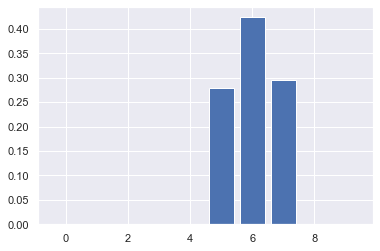

In [ ]:
# summarize feature importance
for i,v in enumerate(importance):
	print('Feature: %0d, Score: %.5f' % (i,v))
# plot feature importance
plt.bar([x for x in range(len(importance))], importance)
plt.show()

In [ ]:
importante=pd.DataFrame(RFR.feature_importances_,columns=["Importancia"])
importante
features=pd.DataFrame(data=importance)
columnass=X5.columns
importante=pd.DataFrame(data=features.values,index=columnass,columns=['Importancia'])
importante.sort_values('Importancia',ascending=False,inplace=True)
importante.head()

,Importancia
surface_covered2,0.423541
precio_sf2,0.295125
surface_total2,0.278366
lon,0.000678
lat,0.000585


In [ ]:
%%time
y_train_pred_RFR = RFR.predict(X_train6)
y_test_pred_RFR = RFR.predict(X_test6)

Wall time: 41.7 s


In [ ]:
from sklearn import metrics
from sklearn.model_selection import cross_val_score
import warnings
warnings.filterwarnings('ignore')

El r2 sobre el set de entrenamiento: 0.9993411566676851
El r2 sobre el set de evaluacion: 0.9966289312419695

RMSE (en Train): 4645.27476619014
RMSE (en Test): 15457.389351136133

El error absoluto medio sobre el set de entrenamiento: 529.2314639330759
El error absoluto medio sobre el set de evaluacion: 1356.9487144654993



Text(0, 0.5, 'y_pred (test)')

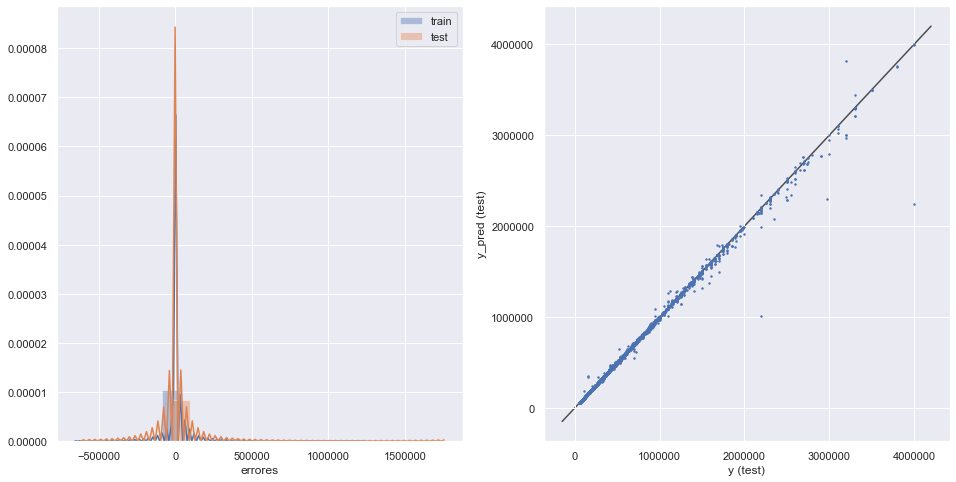

In [ ]:
plt.figure(figsize = (16,8))
plt.title("Random Forest: con optimización de hiperparámetros") 
plt.subplot(1,2,1)
sns.distplot(y_train6 - y_train_pred_RFR, bins = 20, label = 'train',kde_kws = {'bw' : 1})
sns.distplot(y_test6 - y_test_pred_RFR, bins = 20, label = 'test',kde_kws = {'bw' : 1})
plt.xlabel('errores')
plt.legend()

y_train_pred7 = xgb_.predict(X_train6)
y_test_pred7 = xgb_.predict(X_test6)

train_maxe10 = r2_score(y_train6, y_train_pred_RFR)
test_maxe10 = r2_score(y_test6, y_test_pred_RFR)
#train_maxe = np.mean(scores_4['train_r2'])
#test_maxe = np.mean(scores_4['test_r2'])
print('El r2 sobre el set de entrenamiento:', train_maxe10)
print('El r2 sobre el set de evaluacion:',test_maxe10)
print()
rmse_train2 = np.sqrt(mean_squared_error(y_train6, y_train_pred7))
rmse_test2 = np.sqrt(mean_squared_error(y_test6, y_test_pred7))
print(f'RMSE (en Train): {rmse_train2}')
print(f'RMSE (en Test): {rmse_test2}')
print() 
    
train_mae10 = mean_absolute_error(y_train6, y_train_pred_RFR)
test_mae10 = mean_absolute_error(y_test6, y_test_pred_RFR)
print('El error absoluto medio sobre el set de entrenamiento:', train_mae10)
print('El error absoluto medio sobre el set de evaluacion:',test_mae10)
print()    
    


ax = plt.subplot(1,2,2)
ax.scatter(y_test6,y_test_pred_RFR, s =2)

lims = [
np.min([ax.get_xlim(), ax.get_ylim()]),  # min of both axes
np.max([ax.get_xlim(), ax.get_ylim()]),  # max of both axes]
]

ax.plot(lims, lims, 'k-', alpha=0.75, zorder=0)
plt.xlabel('y (test)')
plt.ylabel('y_pred (test)')

## Conclusión sobre la optimización de RandomizedSearchCV y GridSearchCV
> Lo hicimos solamente para RandomForestRegressor, ya que tomaba muchísimo tiempo (más de 13 horas). Si bien tiene una gran mejora sobre los errores, yo no lo elijo como optimizador de hiperparámetros en este caso.
Obviamente eso va a depender del Científico de datos que esté analizando la cuestión y que tan importante es la variable que queremos predecir.
Si se trata de dar un falso negativo ante X enfermedad, siendo que eso puede contagiar a más personas o provocar la muerte de alguien, y al mismo tiempo salvar vidas, buenísimo. En ese caso apliquemos lo más exhaustivo que tengamos, pero no es el caso.
> * Anteriormente dió `con CV`:
> * El r2 sobre el set de entrenamiento: 0.8567954198401873
> * El r2 sobre el set de evaluacion: 0.8645566362690893
> * El error absoluto medio sobre el set de entrenamiento: 64458.69627500574
> * El error absoluto medio sobre el set de evaluacion: 64826.78294240398
> * RMSE (en Train): 117501.97063853174
> * RMSE (en Test): 108323.75998183058

> * Luego con el `RandomizedSearchCV y GridSearchCV`:

> * El r2 sobre el set de entrenamiento: 0.9993411566676851
> * El r2 sobre el set de evaluacion: 0.9966289312419695
> * RMSE (en Train): 4645.27476619014
> * RMSE (en Test): 15457.389351136133
> * El error absoluto medio sobre el set de entrenamiento: 529.2314639330759
> * El error absoluto medio sobre el set de evaluacion: 1356.9487144654993

## Comparación de modelos
> En el gráfico no se puede apreciar lo que queremos mostrar, que es como va cambiando la distribución de errores con los diferentes modelos.
Esto está dado porque hay modelos que overfitean bastante los datos y genera un aplastamiento de datos sobre los otros, lo que hace que no se pueda apreciar bien.

Wall time: 192 ms


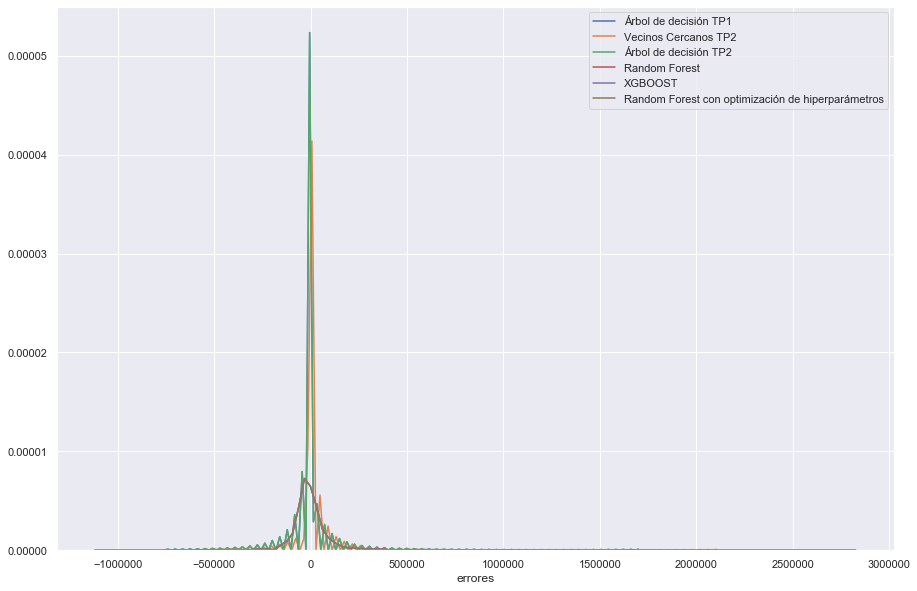

In [ ]:
%%time
plt.figure(figsize = (15,10))
sns.distplot(np.array((y_test_proyecto)-(y_test_pred_proyecto)).reshape(-1,1),bins=30, label='Árbol de decisión TP1',hist=False,kde_kws = {'bw' : 1})
sns.distplot(np.array((y_test6) -(y_test_pred3)).reshape(-1,1), bins = 30, label = 'Vecinos Cercanos TP2',hist=False,kde_kws = {'bw' : 1})
sns.distplot(np.array((y_test6) -(y_test_pred4)).reshape(-1,1), bins = 30, label = 'Árbol de decisión TP2',hist=False,kde_kws = {'bw' : 1})
sns.distplot(np.array((y_test6) -(y_test_pred8)).reshape(-1,1), bins = 30, label = 'Random Forest',hist=False,kde_kws = {'bw' : 1})
sns.distplot(np.array((y_test6) -(y_test_pred7)).reshape(-1,1), bins = 30, label = 'XGBOOST',hist=False,kde_kws = {'bw' : 1})
sns.distplot(np.array((y_test6) -(y_test_pred7)).reshape(-1,1), bins = 30, label = 'Random Forest con optimización de hiperparámetros',hist=False,kde_kws = {'bw' : 1})

plt.xlabel('errores')
plt.legend()

### En el gráfico se puede apreciar la "veracidad" del modelo RandomForest con la optimización de hiperparámetros Randomsearch y Gridsearch, es el mejor modelo.

## Parte C

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.model_selection import RandomizedSearchCV
from sklearn.model_selection import cross_validate
from sklearn.model_selection import RandomizedSearchCV
from sklearn.model_selection import GridSearchCV

In [ ]:
### Definimos el dataset (de nuevo)
X5=df2.drop(['price','lat','lon','start_date','end_date','created_on','l1','l2','l3','currency','title','description','property_type','operation_type',],axis=1)                                                                                 
y5=df2['price']
X5.head(1)

,rooms,bedrooms,bathrooms,surface_total2,surface_covered2,precio_sf2,BarriosEncodeados,Tipo_Prop_Encodeada,BarriosEncodeados2
1,2.0,1.0,2.0,70.0,58.0,2271.428571,1.0,1.0,1.0


In [ ]:
%%time
from sklearn.datasets import make_regression
from sklearn.inspection import permutation_importance

Wall time: 0 ns


Vecinos Cercanos:
Feature: 0, Score: 0.00025
Feature: 1, Score: 0.00043
Feature: 2, Score: 0.01537
Feature: 3, Score: 0.01074
Feature: 4, Score: 0.00758
Feature: 5, Score: 0.60785
Feature: 6, Score: 0.42032
Feature: 7, Score: 0.89088
Feature: 8, Score: 0.22046
Feature: 9, Score: 0.00101


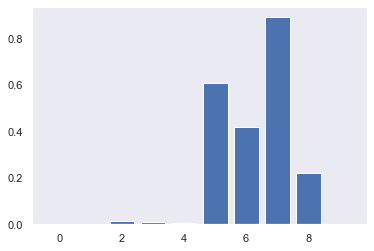

In [ ]:
print('Vecinos Cercanos:')
# Definimos el modelo

results = permutation_importance(vecinos_cercanos3, X2, y2, scoring='accuracy')
# get importance
importance = results.importances_mean
# summarize feature importance
for i,v in enumerate(importance):
	print('Feature: %0d, Score: %.5f' % (i,v))
# plot feature importance
plt.bar([x for x in range(len(importance))], importance)
plt.grid()
plt.show()

In [ ]:
features=pd.DataFrame(data=importance)
columnass=X5.columns
importante=pd.DataFrame(data=features.values,index=columnass,columns=['Importancia_VecinosCercanos'])
importante.sort_values('Importancia',ascending=False,inplace=True)
importante.head()

KeyError: 'Importancia'

Para Arbol de decision:
Feature: 0, Score: 0.04368
Feature: 1, Score: 0.05187
Feature: 2, Score: 0.00856
Feature: 3, Score: 0.00902
Feature: 4, Score: 0.01392
Feature: 5, Score: 0.22318
Feature: 6, Score: 0.04214
Feature: 7, Score: 0.57882
Feature: 8, Score: 0.02235
Feature: 9, Score: 0.00645


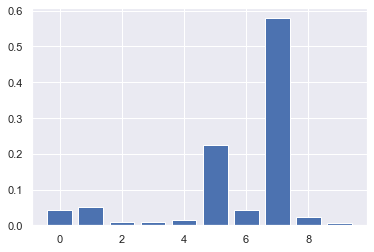

In [ ]:
print('Para Arbol de decision:')
# get importance
importance2 = tree.feature_importances_
# summarize feature importance
for i,v in enumerate(importance2):
	print('Feature: %0d, Score: %.5f' % (i,v))
# plot feature importance
plt.bar([x for x in range(len(importance2))], importance2)
plt.show()

In [ ]:
features2=pd.DataFrame(data=importance2)
columnass2=X3.columns
importante2=pd.DataFrame(data=features2.values,index=columnass2,columns=['Importancia_TreeClassifier'])
importante2.sort_values('Importancia_TreeClassifier',ascending=False,inplace=True)
importante2.head()

,Importancia_TreeClassifier
precio_sf2,0.578824
surface_total2,0.223178
lon,0.051874
lat,0.043683
surface_covered2,0.042138


Para RandomForestRegressore con CV
Feature: 0, Score: 0.00000
Feature: 1, Score: 0.00000
Feature: 2, Score: 0.00000
Feature: 3, Score: 0.00000
Feature: 4, Score: 0.00000
Feature: 5, Score: 0.25303
Feature: 6, Score: 0.48906
Feature: 7, Score: 0.25791
Feature: 8, Score: 0.00000
Feature: 9, Score: 0.00000


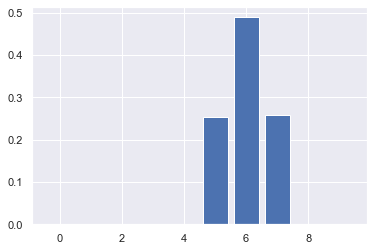

In [ ]:
print('Para RandomForestRegressore con CV')

# get importance
importance3 = clf_RFR.feature_importances_
# summarize feature importance
for i,v in enumerate(importance3):
	print('Feature: %0d, Score: %.5f' % (i,v))
# plot feature importance
plt.bar([x for x in range(len(importance3))], importance3)
plt.show()

In [ ]:
features3=pd.DataFrame(data=importance3)
columnass3=X5.columns
importante3=pd.DataFrame(data=features3.values,index=columnass3,columns=['Importancia_RFR_con_CV'])
importante3.sort_values('Importancia_RFR',ascending=False,inplace=True)
importante3.head()

Para Random Forest Regressor con los mejores parámetros
Feature: 0, Score: 0.00058
Feature: 1, Score: 0.00068
Feature: 2, Score: 0.00043
Feature: 3, Score: 0.00026
Feature: 4, Score: 0.00036
Feature: 5, Score: 0.27837
Feature: 6, Score: 0.42354
Feature: 7, Score: 0.29512
Feature: 8, Score: 0.00055
Feature: 9, Score: 0.00011


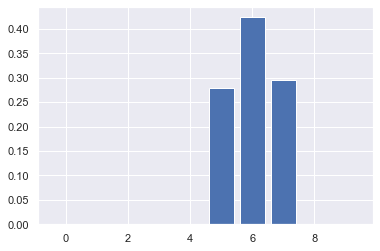

In [ ]:
print("Para Random Forest Regressor con los mejores parámetros")
# get importance
importance4 = RFR.feature_importances_
# summarize feature importance
for i,v in enumerate(importance4):
	print('Feature: %0d, Score: %.5f' % (i,v))
# plot feature importance
plt.bar([x for x in range(len(importance4))], importance4)
plt.show()

In [ ]:
features4=pd.DataFrame(data=importance4)
columnass4=X5.columns
importante4=pd.DataFrame(data=features4.values,index=columnass4,columns=['Importancia_RFR_RdSyGridS'])
importante4.sort_values('Importancia_RFR',ascending=False,inplace=True)
importante4.head()

Feature: 0, Score: 0.00029
Feature: 1, Score: 0.00028
Feature: 2, Score: 0.00015
Feature: 3, Score: 0.00031
Feature: 4, Score: 0.00069
Feature: 5, Score: 0.20216
Feature: 6, Score: 0.66773
Feature: 7, Score: 0.12759
Feature: 8, Score: 0.00062
Feature: 9, Score: 0.00019


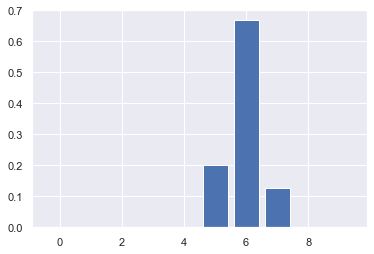

In [ ]:
# get importance
importance5 = xgb_.feature_importances_
# summarize feature importance
for i,v in enumerate(importance5):
	print('Feature: %0d, Score: %.5f' % (i,v))
# plot feature importance
plt.bar([x for x in range(len(importance5))], importance5)
plt.show()

In [ ]:
features5=pd.DataFrame(data=importance5)
columnass5=X5.columns
importante5=pd.DataFrame(data=features5.values,index=columnass5,columns=['Importancia_XGB'])
importante5.sort_values('Importancia_XGB',ascending=False,inplace=True)
importante5.head()

,Importancia_XGB
surface_covered2,0.667727
surface_total2,0.202158
precio_sf2,0.127595
bathrooms,0.000687
BarriosEncodeados,0.000624


#### En el siguiente cuadro mostramos las features más importantes para los diferentes modelos

In [ ]:
dataimpor=importante
dataimpor["DecisionTreeClassifier"]=importante2
dataimpor["RFR_con_CV"]=importante3
dataimpor["RFR_Rds_Y_Rdg"]=importante4
dataimpor["XGB"]=importante5
dataimpor

,Importancia_VecinosCercanos,DecisionTreeClassifier,RFR_con_CV,RFR_Rds_Y_Rdg,XGB
lat,0.000254,0.043683,0.000000,0.000585,0.000287
lon,0.000433,0.051874,0.000000,0.000678,0.000280
rooms,0.015375,0.008564,0.000000,0.000427,0.000146
bedrooms,0.010740,0.009021,0.000000,0.000259,0.000310
bathrooms,0.007580,0.013916,0.000000,0.000359,0.000687
surface_total2,0.607847,0.223178,0.253031,0.278366,0.202158
surface_covered2,0.420323,0.042138,0.489059,0.423541,0.667727
precio_sf2,0.890877,0.578824,0.257910,0.295125,0.127595
BarriosEncodeados,0.220463,0.022355,0.000000,0.000552,0.000624
Tipo_Prop_Encodeada,0.001008,0.006448,0.000000,0.000109,0.000186


### Francisco Alfredo Sabena